# 1. Введение

## 1.1. Цель и задачи работы

**Цель** - построить методами машинного обучения на основе данных численного моделирования термогравитационного течения воздуха через горизонтальный пучок оребренных труб алгебраическое выражение для безразмерного коэффициента теплоотдачи в зависимости от физических и геометрических параметров с целью дальнейшего использования в инженерных расчетах.

**Задачи:**
- построение моделей машинного обучения на основе данных многопараметрических расчетов с использованием различных методов (линейная и полиномиальная регрессия, градиентный бустинг)
- определение ключевых признаков (параметров задачи, оказывающих наибольшее влияние) с помощью метода SHAP для метода градиентного бустинга
- получение выражения для безразмерного коэффициента теплоотдачи с использованием моделей символьной регрессии и нейросетевой архитектуры метода Колмогорова-Арнольда (Kolmogorov-Arnold Network, KAN), сопоставление использованных подходов с оценкой качества

## 1.2. Описание задачи о свободной конвекции вблизи однорядного пучка труб

Постановка задачи для проведения численного моделирования и накопления данных для применения методов МО сформулирована в соответствии с условиями экспериментов, выполненных в Институте тепло- и массообмена имени А.В. Лыкова НАН Беларуси. Адаптированный для расчетов экспериментальный образец включал горизонтальный однорядный трубный пучок, который размещался в специальной камере и состоял из шести биметаллических оребренных труб. В экспериментах варьировался поперечный шаг труб и перепад температуры между поверхностью несущей трубы и окружающим воздухом.

Ламинарное свободноконвективное течение вязкой сжимаемой среды и теплообмен описывались в расчетах системой нестационарных уравнений Навье-Стокса, дополненной уравнением баланса энергии. Использовалась модель сжимаемого совершенного газа со свойствами, зависящими от температуры. Плотность рассчитывалась на основе уравнения Менделеева-Клапейрона. Задача решалась в сопряженной постановке, с учетом теплопередачи через трубные ребра.

Расчетные сетки имели размерность около 150 тыс. ячеек, в ходе методических исследований проверялась сеточная сходимость. Расчеты проводились в CFD-пакете ANSYS Fluent со вторым порядком точности при аппроксимации пространственных и временных производных. Во всех рассчитанных вариантах достигался статистически установившийся режим течения, а размер выборок превысил 500 характерных времен.

Набор данных для МО сформирован в результате проведения многопараметрических гидродинамических расчетов (в количестве более 3000) при варьировании параметров и вычислением во всех вариантах среднего числа Нуссельта.

На этапе разведывательного анализа данных из расширенного набора для записи в табличные файлы были выбраны следующие параметры: шаг труб, осредненный во времени перепад температуры между основанием трубы и окружающей средой и среднее (по трем трубам) число Нуссельта. Дополнительная предобработка данных при формировании датасета не производилась.

## 1.3. Описание задачи о термогравитационном течении через двухрядный пучок труб

Выполнялось численное исследования влияния вытяжной шахты на течение и теплообмен в двухрядном горизонтальном пучке труб, расположенных в шахматном порядке, с относительно тесным поперечным кольцевым оребрением. Рассмотрены две конфигурации – без шахты и с шахтой, которая по высоте в девять раз превосходит диаметр оребрения и содержит внутренние вертикальные (разделительные) перегородки.

Постановка задачи основывалась на данных экспериментов, в которых наблюдался ламинарный режим течения воздух вблизи труб. Численно, на основе метода конечных объемов, решалась система нестационарных уравнений Навье-Стокса, дополненная уравнением энергии. Использовалась модель сжимаемого совершенного газа с термодинамическими и теплофизическими свойствами, зависящими от температуры. Задачи решались в сопряженной постановке, с учетом теплопередачи через ребра.

Для выполнения расчетов использовался пакет ANSYS Fluent 2019 R3. Расчеты на неструктурированных сетках с гексаэдральными элементами проводились со вторым порядком точности по пространству и времени; для аппроксимации конвективных потоков использовалась противопоточная схема второго порядка. Расчетные сетки включали около 350 тыс. ячеек, достаточность размерности данной сетки была установлена в результате исследования сеточной чувствительности решения. Шаг по времени принимался равным 0.02 с, что составляет около 0.1 характерных времен оцениваемых по скорости плавучести. Продолжительность выборок, соответствующих статистически установившемуся режиму течения, составляла около 200 с, что для всех вариантов превышало 1000 характерных времен.

Набор данных для МО сформирован в результате проведения многопараметрических гидродинамических расчетов (в количестве более 100) при варьировании параметров и вычислением во всех вариантах среднего числа Нуссельта.

Варьировались следующие параметры: шаг труб, осредненный во времени перепад температуры между основанием трубы и окружающей средой, высота шахты, шаг ребер. Дополнительная предобработка данных при формировании датасета не производилась.

## 1.4. Описание используемых моделей машинного обучения

### Линейная регрессия

Линейная регрессия моделирует зависимую переменную как линейную комбинацию независимых признаков, подбирая коэффициенты методом наименьших квадратов для минимизации ошибки между предсказанными и реальными значениями.

Особенности метода:
- Простая аналитическая форма
  $$\hat y = \beta_0 + \sum_{i=1}^p \beta_i x_i$$  
  где коэффициенты $\beta$ подбираются методом наименьших квадратов (OLS) для минимизации суммы квадратов отклонений между наблюдаемыми и предсказанными значениями
- Высокая интерпретируемость
  каждый коэффициент $\beta_i$ показывает влияние соответствующего признака на ответ при прочих равных.
- Быстрое обучение
  аналитическое решение OLS выполняется за полиномиальное время и масштабируется на большие объёмы данных.
- Контроль переобучения
  возможна регуляризация L2 (Ridge) и L1 (Lasso) для штрафа за большие коэффициенты и снижения дисперсии модели.

### Полиномиальная регрессия

Полиномиальная регрессия расширяет линейную, добавляя в модель степени признаков до порядка $d$, при этом оставаясь линейной по параметрам и оцениваясь тем же методом наименьших квадратов.

Особенности метода:
- Гибкость для криволинейных зависимостей
  $$\hat y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_d x^d$$  
  позволяющая аппроксимировать сложные тренды (Wikipedia).
- Линейность по параметрам
  параметры $\beta$ оцениваются аналитически через OLS, несмотря на нелинейность по $x$.
- Управляемая сложность  
  степень полинома $d$ контролирует баланс «гибкость — переобучение».
- Простота реализации  
  преобразование исходных признаков в полиномиальные степени и последующее применение OLS образуют понятный и детерминированный конвейер.

### QLattice

Ссылка: https://docs.abzu.ai/docs/guides/getting_started/qlattice

Библиотека для символьной регрессии QLattice позволяет находить аналитические формулы, наилучшим образом описывающие данные. Это особенно полезно в инженерных задачах, где важна интерпретируемость модели и понимание физических закономерностей.

Особенности библиотеки:
- поиск интерпретируемых формул, сложность которых можно контролировать, состоящих из базовых математических операций (+, -, *, /, tanh, exp, log)
- применение эволюционного алгоритма и графовых моделей, представляющих связи между переменными через математические операции
- автоматический отбор значимых признаков
- устойчивость к зашумленным данным
- удобная и поддерживаемая интеграция с Python

Таким образом, QLattice является мощным инструментом, который может быть использован в гидрогазодинамике для следующих целей: нахождение новых эмпирических зависимостей, упрощение сложных моделей, получение обоснованных и относительно простых инженерных формул. Последний вариант применения и рассматривается в данной работе.

### PySR

Ссылка на библиотеку PySR: https://ai.damtp.cam.ac.uk/pysr/

Ссылка на GitHub: https://github.com/MilesCranmer/PySR

Библиотека для символьной регрессии PySR позволяет автоматически находить компактные и интерпретируемые аналитические выражения, наилучшим образом описывающие данные, сочетая гибкий эволюционный поиск с высокопроизводительным бэкендом на Julia.

Особенности библиотеки:

- Поиск формул из базовых операторов (+, -, *, /, sin, exp, log и др.) с контролем сложности через штрафы и ограничения глубины

- Многопопуляционный эволюционный алгоритм с циклом «эволюция – упрощение – оптимизация»

- Встроенная оптимизация численных констант (Nelder–Mead, BFGS)

- Автоматический отбор признаков и опциональное подавление шума

- Масштабирование на многопроцессорные и распределённые кластеры

- Удобная интеграция с Python: PySRRegressor, вывод в SymPy, LaTeX, а также экспорт в PyTorch и JAX

Принцип эволюционного алгоритма PySR:

PySR использует многопопуляционный эволюционный алгоритм с уникальным циклом «эволюция → упрощение → оптимизация», распараллеливая поиск по нескольким «островам» моделей одновременно

1. Инициализация: создаётся несколько популяций случайных выражений

2. Генетические операторы: в потомков вносят мутации (замена операторов, изменение констант, добавление/удаление поддеревьев) и кроссовер (обмен поддеревьями между выражениями), после чего проводится турни́рный отбор наиболее приспособленных

3. Упрощение и оптимизация: каждый отобранный индивид упрощают (удаляют избыточные узлы), затем численно настраивают его константы методами Nelder–Mead или BFGS для точной подгонки

4. Миграция: лучшие решения периодически переселяются между популяциями, что повышает разнообразие и ускоряет поиск глобальных оптимумов

После заданного числа итераций возвращается набор выражений на «Парето-границе» точность–сложность.
    
Таким образом, PySR отлично подходит для гидрогазодинамики: он помогает выявлять новые эмпирические зависимости, упрощать сложные численные модели и получать обоснованные инженерные формулы.

### KAN (библиотека PyKAN)

Ссылка на статью с подробным описанием архитектуры: https://arxiv.org/pdf/2404.19756

Ссылка на библиотеку Pykan: https://github.com/KindXiaoming/pykan

Архитектура нейронных сетей Колмогорова-Арнольда (Kolmogorov-Arnold Networks, KAN) основана на теореме представления Колмогорова-Арнольда, которая утверждает, что любую непрерывную функцию нескольких переменных можно точно выразить через композицию конечного числа непрерывных функций одной переменной и операций сложения.

Особенности архитектуры KAN:

1) Отказ от линейных преобразований
- в отличие от традиционных MLP (Multilayer Perceptrons), где каждый нейрон выполняет линейное преобразование с последующей нелинейной активацией, KAN использует нелинейные функции на ребрах (а не в узлах)
- узлы суммируют входящие сигналы, а нелинейные преобразования происходят на связях между нейронами

2) Адаптивные функции активации
- вместо фиксированных функций (ReLU, sigmoid) KAN использует сплайны или другие параметризованные функции, которые обучаются в процессе тренировки
- позволяют сети автоматически подстраивать свою структуру под данные

3) Иерархическая декомпозиция
- KAN стремится разложить сложную многомерную функцию на цепочку более простых одномерных функций в соответствии с теоремой Колмогорова-Арнольда

4) Интерпретируемость
- поскольку каждая связь представляет собой параметризованную одномерную функцию, KAN потенциально более интерпретируем чем MLP
- позволяет выводить символьные формулы, эффективно представляющие выученные закономерности

Таким образом, предполагается, что KAN может выполнить символьную регрессию не только эффективно, но и обоснованно, что имеет критическое значение для физических задач.

# 2. Применение базовых моделей машинного обучения

In [3]:
# Импорт необходимых Python-библиотек
import operator
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

!pip install pysr
from pysr import PySRRegressor

import torch
import torch.nn as nn
import torch.optim as optim

!pip install feyn
import feyn

import shap

from google.colab import drive

!pip install pykan
from kan import *
!pip install gplearn
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function






In [7]:
# Стиль рисунков
sns.set(style="white")
sns.set_palette("gray")

In [8]:
drive.mount('/content/drive')
data1 = pd.read_excel('/content/drive/My Drive/Python ML/dataset_tube_bundle.xlsx', sheet_name='dataset_epsilon', index_col=None, usecols=['εT','Nu_sum'])
data1_Nu_pd = pd.DataFrame(data1['Nu_sum'])
data1_dT_pd = pd.DataFrame(data1['εT'])
drive.flush_and_unmount()

Mounted at /content/drive


In [9]:
# Примеры случайных значений переменных
print(f'Входная переменная dT:')
data1_dT_pd.sample(10)

Входная переменная dT:


,εT
956,0.698407
978,0.713318
705,0.528295
866,0.637411
726,0.542528
322,0.268722
368,0.299898
381,0.308709
833,0.615046
231,0.207048


In [10]:
print(f'Целевая переменная Nu:')
data1_Nu_pd.sample(10)

Целевая переменная Nu:


,Nu_sum
380,1.618326
438,1.688332
644,1.823291
382,1.619280
135,1.166288
9,0.759462
486,1.733136
795,1.889390
468,1.708643
408,1.648014


In [11]:
drive.mount('/content/drive')
data2 = pd.read_excel('/content/drive/My Drive/Python ML/dataset_tube_bundle.xlsx', sheet_name='dataset_sigma', index_col=None, usecols=['σ','Nu_sum'])
data2_Nu_pd = pd.DataFrame(data2['Nu_sum'])
data2_S_pd = pd.DataFrame(data2['σ'])
drive.flush_and_unmount()

Mounted at /content/drive


In [12]:
# Примеры случайных значений переменных
print(f'Входная переменная σ:')
data2_S_pd.sample(10)

Входная переменная σ:


,σ
366,1.665493
956,2.704225
733,2.311620
86,1.172535
128,1.246479
334,1.609155
323,1.589789
804,2.436620
647,2.160211
360,1.654930


In [13]:
print(f'Целевая переменная Nu:')
data2_Nu_pd.sample(10)

Целевая переменная Nu:


,Nu_sum
942,1.445917
375,1.710910
555,1.505737
785,1.465633
904,1.450450
66,1.917283
975,1.442867
411,1.633062
356,1.717148
923,1.447900


In [64]:
drive.mount('/content/drive')
data3 = pd.read_excel('/content/drive/My Drive/Python ML/dataset_tube_bundle_shaft.xlsx', sheet_name='bundle_shaft', index_col=None, usecols=['σ','s/d','H/d','εT','Nu_sum'])
data3_Nu_pd = pd.DataFrame(data3['Nu_sum'])
data3_Feat_pd = data3[['σ','s/d','H/d','εT']]
drive.flush_and_unmount()

Mounted at /content/drive


In [65]:
# Примеры случайных значений переменных
print(f'Входные переменные:')
data3_Feat_pd.sample(10)

Входные переменные:


,σ,s/d,H/d,εT
31,1.02,0.085563,4.577465,0.712296
34,1.02,0.128345,4.577465,0.712296
19,1.02,0.042782,4.577465,0.390165
87,1.53,0.128345,0.000000,0.196626
35,1.02,0.128345,9.154930,0.712296
93,1.53,0.085563,0.000000,0.390165
20,1.02,0.042782,9.154930,0.390165
41,1.14,0.085563,9.154930,0.052041
68,1.14,0.085563,9.154930,0.712296
82,1.53,0.042782,4.577465,0.196626


In [66]:
print(f'Целевая переменная Nu:')
data3_Nu_pd.sample(10)

Целевая переменная Nu:


,Nu_sum
7,8.989473
78,5.574378
85,7.830996
54,1.748384
101,4.145596
105,11.405299
9,1.102552
59,16.015819
10,4.216854
36,0.756364


## 2.1. Линейная регрессия

### 2.1.1 Зависимость числа Нуссельта от перепада температур

In [ ]:
X_T  = data1_dT_pd.values
y_T = data1_Nu_pd.values

In [ ]:
# разделяем на обучающую и тестовую
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(X_T, y_T, test_size=0.2, random_state=42)

In [ ]:
# Обучение линейной регрессии
model_LR = LinearRegression()
model_LR.fit(X_T_train, y_T_train)

# Прогнозирование сна тестовой выборке
y_LR_test = model_LR.predict(X_T_test)

# Оценка качества модели тестовой
print(f'MSE_test: {mean_squared_error(y_T_test, y_LR_test)}')

# Прогнозирование на всей выборке
y_LR_all = model_LR.predict(X_T)

# Оценка качества модели на всех данных
print(f'MSE_all: {mean_squared_error(y_T, y_LR_all)}')

MSE_test: 0.014558622794602369
MSE_all: 0.014981193029385251


In [ ]:
# Печать предсказанных значений Nu, весовых коэффициентов и свободного члена (для составления формулы)
print(y_LR_all)
print(model_LR.coef_)
print(model_LR.intercept_)

[[1.0886499 ]
 [1.0896904 ]
 [1.0907309 ]
 ...
 [2.12706808]
 [2.12810858]
 [2.12914908]]
[[1.53525653]]
[1.01113271]


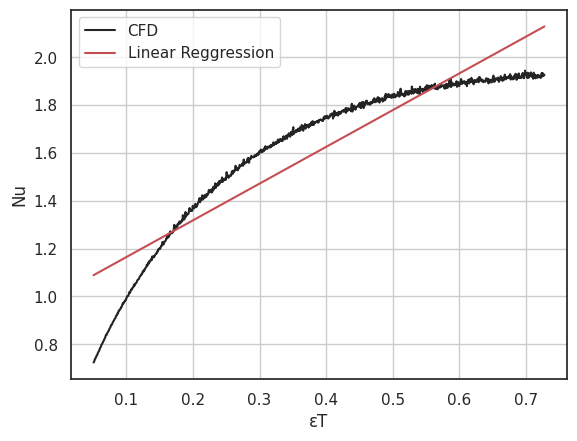

In [ ]:
# Отрисовка графиков Nu от eT
plt.plot(data1_dT_pd, data1_Nu_pd, label='CFD')
plt.plot(data1_dT_pd, y_LR_all, label='Linear Reggression', c='r')
plt.ylabel('Nu')
plt.xlabel('εT')
plt.legend()
plt.grid(True)
plt.show()

### 2.1.2 Зависимость числа Нуссельта от расстояния между трубами

In [ ]:
X_sigma = data2_S_pd.values
y_sigma = data2_Nu_pd.values

In [ ]:
# разделяем на обучающую и тестовую
X_sigma_train, X_sigma_test, y_sigma_train, y_sigma_test = train_test_split(X_sigma, y_sigma, test_size=0.2, random_state=42)

In [ ]:
# Обучение линейной регрессии
model_LR = LinearRegression()
model_LR.fit(X_sigma_train, y_sigma_train)

# Прогнозирование сна тестовой выборке
y_LR_test = model_LR.predict(X_sigma_test)

# Оценка качества модели тестовой
print(f'MSE_test: {mean_squared_error(y_sigma_test, y_LR_test)}')

# Прогнозирование на всей выборке
y_LR_all = model_LR.predict(X_sigma)

# Оценка качества модели на всех данных
print(f'MSE_all: {mean_squared_error(y_sigma, y_LR_all)}')

MSE_test: 0.002619787658692392
MSE_all: 0.002590430962516844


In [ ]:
# Печать предсказанных значений Nu, весовых коэффициентов и свободного члена (для составления формулы)
print(y_LR_all)
print(model_LR.coef_)
print(model_LR.intercept_)

[[1.88021135]
 [1.87968162]
 [1.8791519 ]
 ...
 [1.35154763]
 [1.35101791]
 [1.35048818]]
[[-0.30088276]]
[2.18745078]


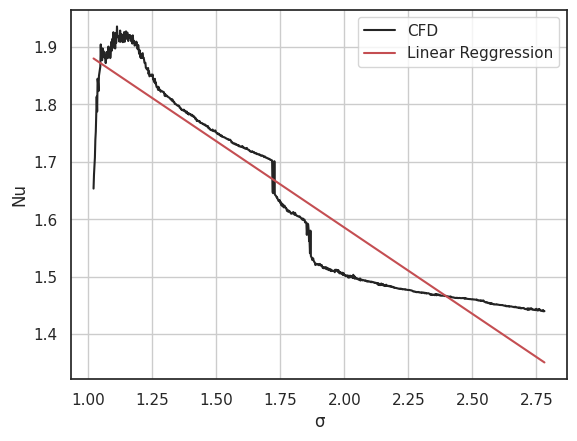

In [ ]:
# Отрисовка графиков зависимости Nu от σ
plt.plot(data2_S_pd, data2_Nu_pd, label='CFD')
plt.plot(data2_S_pd, y_LR_all, label='Linear Reggression', c='r')
plt.ylabel('Nu')
plt.xlabel('σ')
plt.legend()
plt.grid(True)
plt.show()

Линейная регрессия плохо подходит для подобного типа задач, поэтому дальше рассматривать данную модель нет смысла.

## 2.2 Полиномиальная регрессия

### 2.2.1 Зависимость числа Нуссельта от перепада температур

In [ ]:
# Функция регрессии со степенью полинома
def regression(parameters, samples_train, targets_train) -> object:
    '''
    Функция выполняет регрессию со степенью полинома.

    Параметры вызова:
    parameters -- параметры модели
    samples_train -- образцы для обучения
    targets_train -- целевые данные для обучения

    Возвращаемые параметры:
    model -- обученная модель
    best_degree -- лучшая степень полинома
    '''

    # Использование функции GridSearchCV ("поиск по сетке") для поиска лучших параметров модели
    search = GridSearchCV(make_pipeline(PolynomialFeatures(), LinearRegression()),
                          param_grid=parameters, n_jobs=-1, cv=5)
    search.fit(samples_train, targets_train)

    # Получение лучшей степени полинома на основе результатов выполнения функции GridSearchCV
    best_degree = search.best_params_['polynomialfeatures__degree']

    # Создание модели с лучшей степенью полинома и обучение модели
    model = make_pipeline(PolynomialFeatures(degree=best_degree), LinearRegression(n_jobs=-1))
    return model.fit(samples_train, targets_train)

In [ ]:
# Вызов функции, выполняющей регрессию со степенью полинома
model_PR = regression({'polynomialfeatures__degree': np.arange(1, 5)}, X_T, y_T)

# Прогнозирование с использованием обученной модели
y_PR_all = model_PR.predict(X_T)

# Оценка качества модели
print(f'MSE: {mean_squared_error(y_T, y_PR_all)}')

MSE: 4.08593586381202e-05


In [ ]:
# Печать предсказанных значений Nu, весовых коэффициентов и свободного члена (для составления формулы)
print(y_PR_all)
print(model_PR[1].coef_)
print(model_PR[1].intercept_)

[[0.73026903]
 [0.73422959]
 [0.73817866]
 ...
 [1.92205448]
 [1.92205813]
 [1.92205977]]
[[  0.           7.22895975 -14.76626516  15.41269898  -6.63040455]]
[0.40097296]


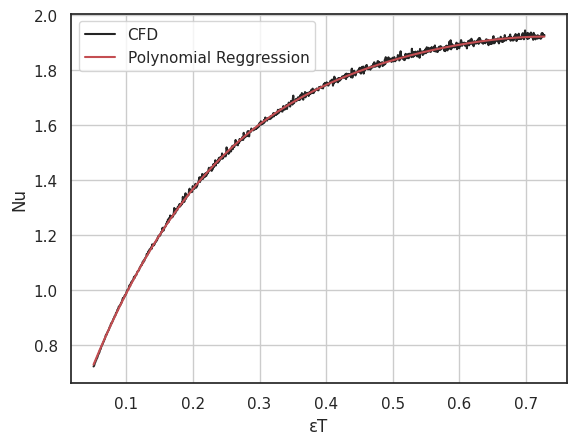

In [ ]:
# Отрисовка графиков Nu от eT
plt.plot(data1_dT_pd, data1_Nu_pd, label='CFD')
plt.plot(data1_dT_pd, y_PR_all, label='Polynomial Reggression', c='r')
plt.ylabel('Nu')
plt.xlabel('εT')
plt.legend()
plt.grid(True)
plt.show()

### 2.2.2 Зависимость числа Нуссельта от расстояния между трубами

In [ ]:
# Вызов функции, выполняющей регрессию со степенью полинома
model_PR = regression({'polynomialfeatures__degree': np.arange(1, 5)}, X_sigma, y_sigma)

# Прогнозирование с использованием обученной модели
y_PR_all = model_PR.predict(X_sigma)

# Оценка качества модели
print(f'MSE: {mean_squared_error(y_sigma, y_PR_all)}')

MSE: 0.00134146331457316


In [ ]:
# Печать предсказанных значений Nu, весовых коэффициентов и свободного члена (для составления формулы)
print(y_PR_all)
print(model_PR[1].coef_)
print(model_PR[1].intercept_)

[[1.96091732]
 [1.95991201]
 [1.95890765]
 ...
 [1.4282785 ]
 [1.42821734]
 [1.42815713]]
[[ 0.         -0.88294549  0.15260732]]
[2.70339295]


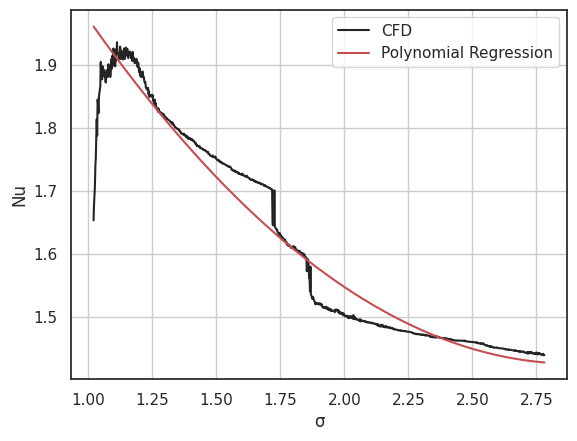

In [ ]:
# Отрисовка графиков зависимости Nu от σ

plt.plot(data2_S_pd, data2_Nu_pd, label='CFD')
plt.plot(data2_S_pd, y_PR_all, label='Polynomial Regression', c='r')
plt.ylabel('Nu')
plt.xlabel('σ')
plt.legend()
plt.grid(True)
plt.show()

# 3. Символьная регрессия

## 3.1. Зависимость числа Нуссельта от перепада температур

### QLattice

In [ ]:
data1_Nu = data1_Nu_pd.values[:,0]
data1_dT = data1_dT_pd.values[:,0]

**Исходные данные**

In [ ]:
# Создание экземпляра класса
ql = feyn.QLattice(random_seed=21)

# Определение списков для моделей и потерь
models = []
loss_history1_ql = []

# Задание количества эпох
n_epochs = 10

# Вычисление исходной вероятности на основе входных данных
# (данные, целевая переменная)
priors = feyn.tools.estimate_priors(data1, 'Nu_sum')

# Обновление вероятностей
ql.update_priors(priors)

for epoch in range(n_epochs):
    # Отбор новых образцов моделей и добавление их в список
    # (названия столбцов,
    #  целевая переменная,
    #  тип (classification, regression, auto),
    #  сложность модели (глубина графа))
    models += ql.sample_models(data1.columns,
                               'Nu_sum',
                               'regression',
                               max_complexity=4
    )

    # Обучение отобранных моделей на данных
    # Возвращается список, отсортированный по потерям
    # (список моделей,
    #  обучающие данные,
    #  вид функции потерь (binary_cross_entropy, squared_error))
    models = feyn.fit_models(models, data1, 'squared_error')

    # Удаление плохих моделей
    # (список моделей,
    #  максимальное количество оставляемых)
    models = feyn.prune_models(models)

    # Предсказание лучшей модели
    pred = models[0].predict(data1_dT_pd)

    # Потери для лучшей модели
    loss_history1_ql.append(mean_squared_error(data1_Nu, pred))
    print(f'Epoch = {epoch+1}, MSE: {loss_history1_ql[-1]}')

    # Обновление моделей в соответствии с новыми отсортированными образцами
    ql.update(models)

# 10 лучших и достаточно разных моделей
# (список моделей, количество отбираемых)
best_models1 = feyn.get_diverse_models(models, n=10)

Epoch = 1, MSE: 0.00010205885886936647
Epoch = 2, MSE: 4.171061786987925e-05
Epoch = 3, MSE: 4.124212059370772e-05
Epoch = 4, MSE: 4.2816681668174637e-05
Epoch = 5, MSE: 4.3344206852661495e-05
Epoch = 6, MSE: 4.128706114889997e-05
Epoch = 7, MSE: 4.220579662208999e-05
Epoch = 8, MSE: 4.014068954133467e-05
Epoch = 9, MSE: 4.02781069101459e-05
Epoch = 10, MSE: 4.180545009952866e-05


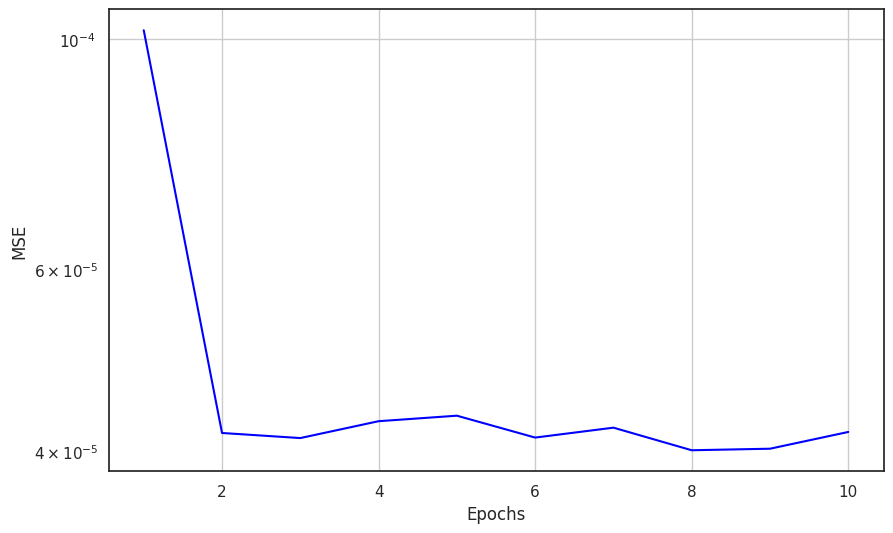

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_history1_ql)+1), loss_history1_ql, color="blue")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
for i, model in enumerate(best_models1):
  sympy_model = model.sympify(signif=3)
  print('Model',i,':', sympy_model)

Model 0 : -0.0578*εT + 2.03 - 1.64*exp(-4.66*εT)
Model 1 : 1.95 - 3.09*exp(-4.7*(-εT - 0.0548)**2 - 2.0*tanh(2.54*εT + 0.667)**2)
Model 2 : 1.97 - 1.28*exp((0.134 - 2.98*εT)*(0.121*εT + 1.61))
Model 3 : -0.82*εT + 3.52 + 1.86/(-1.75*εT - 0.586)
Model 4 : 1.98 - 1.6*exp(-4.83*εT)
Model 5 : 1.98 - 1.6*exp(-4.83*εT)
Model 6 : 2.41*exp(-0.483*(0.745 - εT)**2 - 0.71*exp(-8.98*εT)) - 0.487
Model 7 : 1.98 - 1.6*exp(-4.83*εT)
Model 8 : 2.28 - 0.353*exp(2.68*(εT - 0.794)**2)
Model 9 : 2.08*sqrt(tanh(2.67*εT + 0.0253)) - 0.112


In [ ]:
best1_ql = best_models1[3]
sympy_model = best1_ql.sympify(signif=3)
sympy_model.as_expr()

-0.82*εT + 3.52 + 1.86/(-1.75*εT - 0.586)

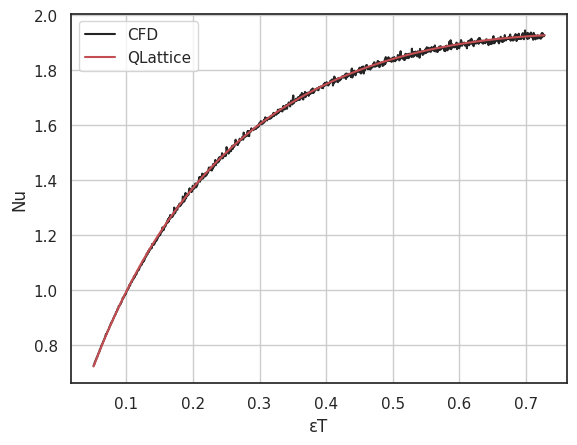

In [ ]:
# Отрисовка графиков зависимости Nu от dT
plt.plot(data1_dT, data1_Nu, label='CFD')
plt.plot(data1_dT, best1_ql.predict(data1_dT_pd), label='QLattice', c='r')
plt.ylabel('Nu')
plt.xlabel('εT')
plt.legend()
plt.grid(True)
plt.show()

### PySR

In [ ]:
X_T  = data1_dT_pd.values.reshape(-1, 1)
y_T = data1_Nu_pd.values

**Исходные данные**

По умолчанию PySR задействует все ядра на компьютере, при этом каждый запуск обучения может приводить к различным конечным результатам. Для воспроизведения результатов необходимо проводить обучение на одном ядре.

In [ ]:
model = PySRRegressor(
    random_state=42, # для воспроизведения
    deterministic=True,
    parallelism='serial',
    maxsize=15, # максимальный размер формул
    niterations=400,               # число итераций эволюции: формулы - точность - лучшие
    population_size=50,           # размер популяции - в каждом поколении N функций
    parsimony=0.05, # штраф за сложность: MSE + parsimony * сложность
    binary_operators=["+", "-", "*", "/"], # бинарные операции
    unary_operators=[             # разрешенные операторы
        "sqrt", # хорошо описывает замедляющий рост
        "exp", #  сигмоидальные кривые
        "square", # если есть квадратичная
        "inv(x) = 1/x", # полезен для дробно-линейных
    ],
    constraints={
        "sqrt": 4,      # Не более 4 sqrt
        "exp": 1,       # Не более 1 exp в формуле
    },
    nested_constraints={
        "sqrt": {"sqrt": 0}
    },  # Запретить sqrt внутри sqrt
    extra_sympy_mappings={"inv": lambda x: 1 / x}, # определяем оператор для sympy
)

model.fit(X_T, y_T, variable_names=["T"])

print(model)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 5.280e+04
Progress: 174 / 12400 total iterations (1.403%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.042e-01  1.594e+01  y = 1.6097
2           3.269e-02  1.160e+00  y = exp(T)
3           2.557e-02  2.457e-01  y = T + 1.2204
4           2.162e-02  1.677e-01  y = exp(T) + 0.10522
5           1.094e-02  6.812e-01  y = (-0.088888 / T) + 1.9603
6           2.526e-03  1.466e+00  y = (-0.45136 / sqrt(T)) - -2.4475
7           2.086e-03  1.915e-01  y = inv((0.22373 / sqrt(T)) - -0.23493)
8           3.443e-04  1.801e+00  y = inv(((0.057306 / T) + 0.32874) - -0.10502)
9           3.438e-04  1.526e-03  y = inv(inv((T * 5.8711) / 0.33578) + 0.43385)
13          3.040e-04  3.069e-02  y = inv(inv(sqrt(T) * (sqrt(T + 0.035079) / 0.066059)) + 0...
     

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          1.6096739   
	1         1.159501                                             exp(T)   
	2         0.245735                                       T + 1.220371   
	3         0.167705                                exp(T) + 0.10521921   
	4         0.681199                     (-0.088888355 / T) + 1.9603437   
	5         3.460339                 inv((0.057221588 / T) + 0.4337784)   
	6         0.460954                      sqrt(T) * (4.270048 - exp(T))   
	7         0.558856            sqrt(T) * (3.3594596 - (T * 1.5188541))   
	8   >>>>  0.829412         3.1627474 / (T + sqrt(inv(T) - 0.5201485))   
	9         0.113884  (((T * 3.462271) / (T + 0.37952057)) + 0.37174...   
	10        0.000002  (inv((T + 0.37952057) / (T * 3.462271)) - T) +...   
	11        0.073344  ((((T * 3.691817) / (T + 0.35084593)) + 0.3973...   
	12      

Так как Google Colab, возможно, имеет другой случайный генератор, было принято загрузить имеющееся решение (обученную модель), полученное на локальной машине. Настройки модели полностью совпадают.

In [ ]:
drive.mount('/content/drive')
model = PySRRegressor.from_file(
    run_directory="/content/drive/My Drive/Python ML/Models_PySR/model_T_1/",
)
drive.flush_and_unmount()

Mounted at /content/drive


Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_T_1/checkpoint.pkl...
INFO:pysr.sr:Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_T_1/checkpoint.pkl...


In [ ]:
# Лучшая функция
rounded_expr = model.sympy().evalf(n=5)
rounded_expr.as_expr()

T*(-0.83997 + 3.2103/(T + 0.34281)) + 0.35365

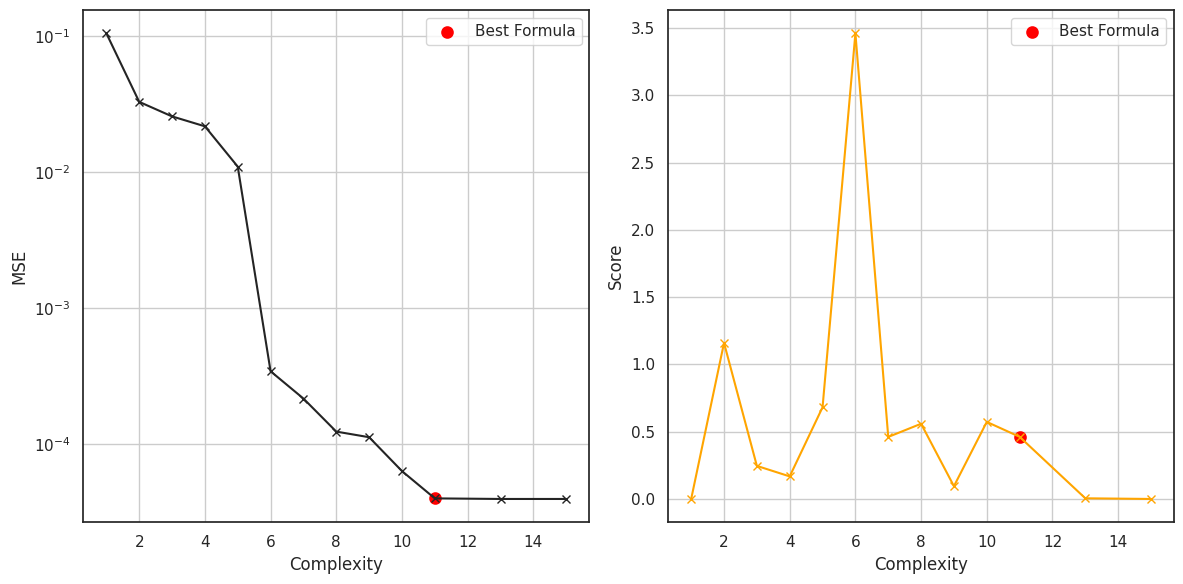

In [ ]:
# Отрисовка графиков зависимости loss и score от complexity
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

index_value = model.get_best().name

### complexity - мера сложности формулы, учитывающая количество операторов, функций и констант в уравнении
### score - комбинированная метрика, которая учитывает точность формулы и её сложность

# График зависимости loss от complexity
axs[0].plot(model.equations_['complexity'], model.equations_['loss'], marker='x')
axs[0].set_xlabel('Complexity')
axs[0].set_ylabel('MSE')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[0].scatter(model.equations_['complexity'].iloc[index_value],
                model.equations_['loss'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

# График зависимости score от complexity
axs[1].plot(model.equations_['complexity'], model.equations_['score'], marker='x', color='orange')
axs[1].set_xlabel('Complexity')
axs[1].set_ylabel('Score')
axs[1].set_yscale('linear')
axs[1].grid(True)

axs[1].scatter(model.equations_['complexity'].iloc[index_value],
                model.equations_['score'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

axs[0].legend()
axs[1].legend()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

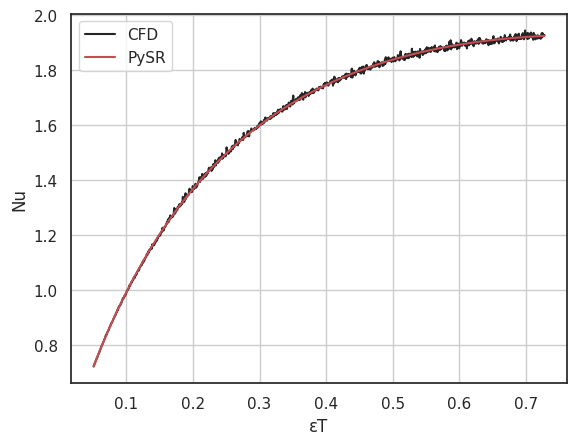

In [ ]:
# Отрисовка графиков зависимости Nu от dT
# Преобразование данных в подходящий формат для предсказания:
# X должен быть 2D-массивом (n_samples, n_features)
X_plot = data1_dT_pd.values.reshape(-1, 1)

# Получение предсказаний модели:
y_pred = model.predict(X_plot)

plt.plot(data1_dT_pd, data1_Nu_pd, label='CFD')
plt.plot(data1_dT_pd, y_pred, label='PySR', c='r')
plt.ylabel('Nu')
plt.xlabel('εT')
plt.legend()
plt.grid(True)
plt.show()

**Логарифм от исходных данных**

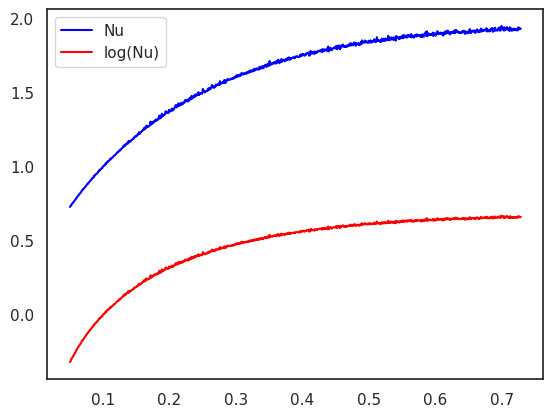

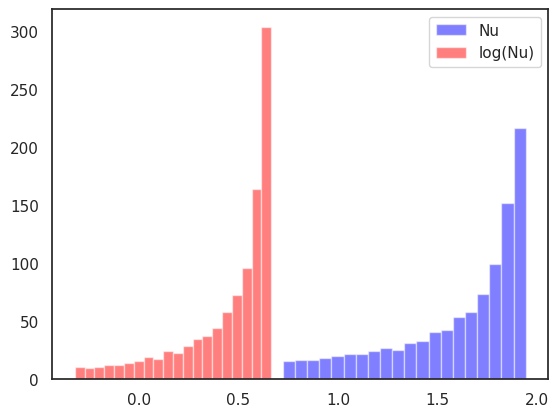

In [ ]:
data1_Nu_log = np.log(data1_Nu)

plt.plot(data1_dT, data1_Nu, color='blue', label='Nu')
plt.plot(data1_dT, data1_Nu_log, color='red', label='log(Nu)')
plt.legend()

plt.figure()
plt.hist(data1_Nu, color='blue', bins=20, alpha=0.5, label='Nu')
plt.hist(data1_Nu_log, color='red', bins=20, alpha=0.5, label='log(Nu)')
plt.legend();

Нет смысла искать формулу для log(Nu): значения по форме распределены так же, как и для Nu (зависимость не степенная).

###GPLearn

In [4]:
def dtanh_fun(x):
    return np.tanh(x)

def exp_fun(x):
    return np.exp(np.longdouble(x))

dtanh = make_function(function=dtanh_fun, name='dtanh', arity=1)
exp = make_function(function=exp_fun, name='exp', arity=1)

In [16]:
data_Nu_pd = pd.DataFrame(data1['Nu_sum'])
data_dT_pd = pd.DataFrame(data1['εT'])

In [17]:
function_set = ['add', 'sub', 'mul', 'div']

model_gp = SymbolicRegressor(population_size=2000, tournament_size=50, init_depth=(4,10),
                           generations=50, stopping_criteria=5e-4,
                           p_crossover=0.7, p_subtree_mutation=0.2,
                           p_hoist_mutation=0.01, p_point_mutation=0.09,
                           max_samples=0.9, verbose=1, function_set=function_set,
                           parsimony_coefficient=1e-3, metric='rmse', random_state=94194,
                           const_range = (-10, 10), )



model_gp.fit(data_dT_pd.values, np.ravel(data_Nu_pd.values))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   570.15      9.88132e+24       63         0.383586         0.351641     19.67m
   1    93.08           614584        3         0.177699         0.239095      4.25m
   2    45.26            251.3       35         0.120088         0.130692      3.66m
   3    34.03          563.293       41        0.0849342        0.0862509      2.87m
   4    16.85          549.852       43        0.0449206        0.0424635      2.55m
   5    28.16          53.3609       43        0.0348965         0.035401      3.26m
   6    39.64          524.992       45        0.0190174        0.0232859      2.69m
   7    45.35           73.148       49        0.0189691        0.0207362      2.80m
   8    45.46           321.41       51        0.0189071        0.0206851  

SymbolicRegressor(const_range=(-10, 10),
                  function_set=['add', 'sub', 'mul', 'div'], generations=50,
                  init_depth=(4, 10), max_samples=0.9, metric='rmse',
                  p_crossover=0.7, p_point_mutation=0.09,
                  p_subtree_mutation=0.2, population_size=2000,
                  random_state=94194, stopping_criteria=0.0005,
                  tournament_size=50, verbose=1)

0.2509563474415831


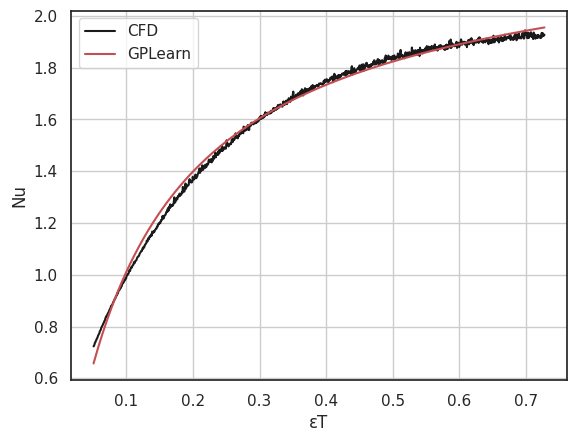

In [18]:
plt.plot(data_dT_pd, data_Nu_pd, label='CFD', c='k')

X_train, X_test, y_train, y_test = train_test_split(data_dT_pd.values, data_Nu_pd.values, test_size=0.1, random_state=1)


X = np.linspace(data_dT_pd.values.min(), data_dT_pd.values.max(), 100)
Y = model_gp.predict(X[:, np.newaxis])
plt.plot(X, Y, label='GPLearn', c='r')

print(np.mean(np.abs(model_gp.predict(data_dT_pd.values)-data_Nu_pd.values)/data_Nu_pd.values))
plt.legend()
plt.ylabel('Nu', fontsize=12)
plt.xlabel('εT', fontsize=12)
plt.grid(True)
plt.show()

## 3.2. Зависимость числа Нуссельта от расстояния между трубами

### QLattice

In [ ]:
data2_Nu = data2_Nu_pd.values[:,0]
data2_S = data2_S_pd.values[:,0]

**Исходные данные**

In [ ]:
# Создание экземпляра класса
ql = feyn.QLattice(random_seed=20)

# Определение списков для моделей и потерь
models = []
loss_history2_ql = []

# Задание количества эпох
n_epochs = 10

# Вычисление исходной вероятности на основе входных данных
priors = feyn.tools.estimate_priors(data2, 'Nu_sum')

# Обновление вероятностей
ql.update_priors(priors)

for epoch in range(n_epochs):
    # Отбор новых образцов моделей и добавление их в список
    models += ql.sample_models(data2.columns, 'Nu_sum', 'regression')

    # Обучение отобранных моделей на данных
    # Возвращается список, отсортированный по потерям
    models = feyn.fit_models(models, data2, 'squared_error')

    # Удаление плохих моделей
    models = feyn.prune_models(models)

    # Предсказание лучшей модели
    pred = models[0].predict(data2_S_pd)

    # Потери для лучшей модели
    loss_history2_ql.append(mean_squared_error(data2_Nu, pred))
    print(f'Epoch = {epoch+1}, MSE: {loss_history2_ql[-1]}')

    # Обновление моделей в соответствии с новыми отсортированными образцами
    ql.update(models)

# 10 лучших и достаточно разных моделей
best_models2 = feyn.get_diverse_models(models, n=10)

Epoch = 1, MSE: 0.0009707216074105533
Epoch = 2, MSE: 0.00016874977025814933
Epoch = 3, MSE: 0.00016571519914388222
Epoch = 4, MSE: 0.0001637590246007523
Epoch = 5, MSE: 0.00016360468249065682
Epoch = 6, MSE: 0.00014618258637011963
Epoch = 7, MSE: 0.00013931385090853933
Epoch = 8, MSE: 0.00013956018802995776
Epoch = 9, MSE: 0.00013592192151273532
Epoch = 10, MSE: 0.00013407669773444719


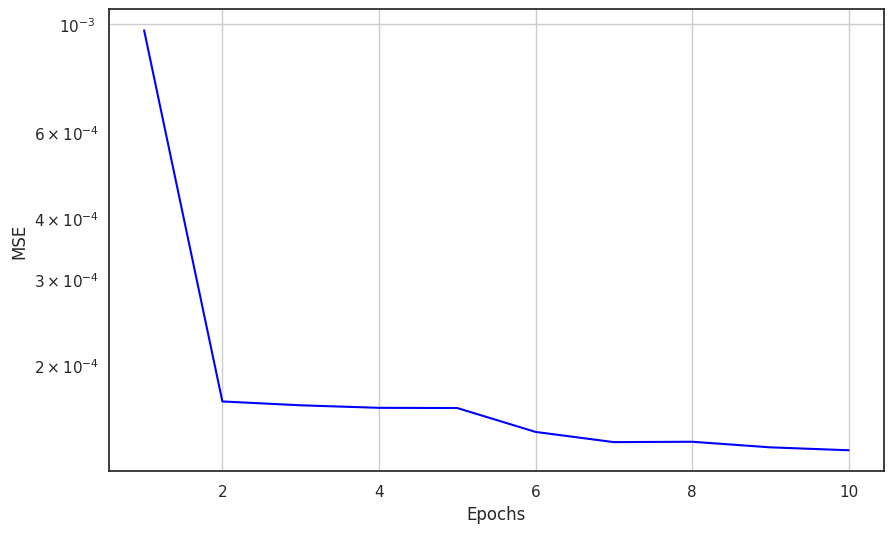

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_history2_ql)+1), loss_history2_ql, color="blue")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
for i, model in enumerate(best_models2):
  sympy_model = model.sympify(signif=3)
  print('Model',i,':', sympy_model)

Model 0 : 0.978*tanh(exp(-1.9*(0.842 - σ)**2 - 19.8*(0.469*σ + 0.318*exp(-0.437*(1 - 0.922*σ)**2 - 86.6*(1 - 0.521*σ)**2*(0.914*σ - 1)**2) - 1)**2)) + 1.45
Model 1 : 0.485*exp(-910.0*(1 - 0.88*σ)**2*(1 - 0.42*σ)**2*(0.607*σ - 1)**2 - 2.0*(0.944*σ - 1)**2) + 1.45
Model 2 : 0.486*exp(-1.79*(1 - 0.965*σ)**2 - 846.0*(1 - 0.878*σ)**2*(0.417*σ - 1)**2*(0.609*σ - 1)**2) + 1.45
Model 3 : 0.643*exp(-0.362*(0.231 - σ)**2 - 2.0*exp(-4.0*exp(-5.42*(1 - 0.792*σ)**2 - 15.6*(0.595*σ - 1)**2) - 4.0*exp(-264.0*(1 - 0.872*σ)**2*(0.327*σ - 1)**2))) + 1.45
Model 4 : 0.482*exp(-704000000000.0*(1 - 0.937*σ)**2*(1 - 0.878*σ)**2*exp(-16.6*σ) - 5.4*(1 - 0.812*σ)**2) + 1.45
Model 5 : 0.361*exp(-204.0*(1 - 0.875*σ)**2*(0.593*σ - 1)**2 - 3.62*(0.854*σ - 1)**2) + 0.361*log(1.55 - 0.223*σ) + 1.46
Model 6 : 1.45 - 0.479*log(exp(-2.0*exp(-147.0*(1 - 0.424*σ)**2*(0.882*σ - 1)**2 - 0.572*(σ + 0.142)**2) - 2.0*exp(-0.209*(-σ - 0.852)**2 - 17.6*(0.635*σ - 1)**2)))
Model 7 : -0.0794*σ + 0.482*exp(-204.0*(1 - 0.928*σ)**2*(

In [ ]:
best2_ql = best_models2[7]
sympy_model = best2_ql.sympify(signif=3)
sympy_model.as_expr()

-0.0794*σ + 0.482*exp(-204.0*(1 - 0.928*σ)**2*(0.572*σ - 1)**2 - 12.3*(0.755*σ - 1)**2) + 1.66

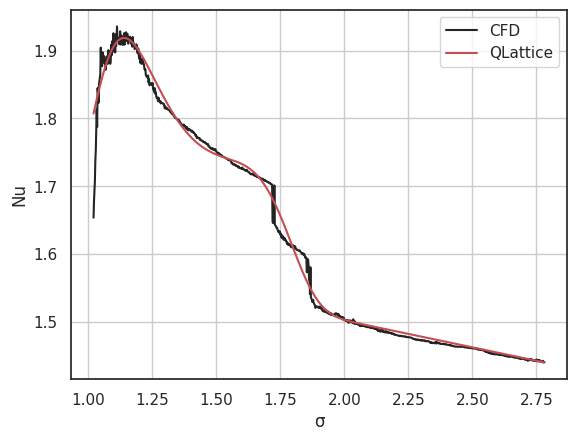

In [ ]:
# Отрисовка графиков зависимости Nu от σ
plt.plot(data2_S, data2_Nu, label='CFD')
plt.plot(data2_S, best2_ql.predict(data2_S_pd), label='QLattice', c='r')
plt.ylabel('Nu')
plt.xlabel('σ')
plt.legend()
plt.grid(True)
plt.show()

### PySR

In [ ]:
X_sigma  = data2_S_pd.values.reshape(-1, 1)
y_sigma = data2_Nu_pd.values

**Исходные данные**

In [ ]:
model_sigma = PySRRegressor(
    random_state=42,      # для воспроизведения результатов
    deterministic=True,
    parallelism='serial',
    maxsize=30,          # максимальный размер формул
    niterations=400,     # число итераций эволюции
    population_size=20,  # размер популяции
    parsimony=0.000001,  # штраф за сложность
    binary_operators=["+", "-", "*", "/"],
    unary_operators=[
        "exp",
        "square",
    ],
    nested_constraints={
        "exp": {"exp": 0},
        "square": {"square": 0},
    },
)

model_sigma.fit(X_sigma, y_sigma, variable_names=["s"])

print(model_sigma)

In [ ]:
drive.mount('/content/drive')
model_sigma = PySRRegressor.from_file(
    run_directory="/content/drive/My Drive/Python ML/Models_PySR/model_sigma_1/",
)
drive.flush_and_unmount()

Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_sigma_1/checkpoint.pkl...
INFO:pysr.sr:Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_sigma_1/checkpoint.pkl...


Mounted at /content/drive


In [ ]:
# Лучшая функция
rounded_expr = model_sigma.sympy().evalf(n=5)
#print(rounded_expr)
rounded_expr.as_expr()

1.454 + 1.454/(628.33*(0.62547*s - 1)**2*(0.85586*s - 1)**2 + exp(s))

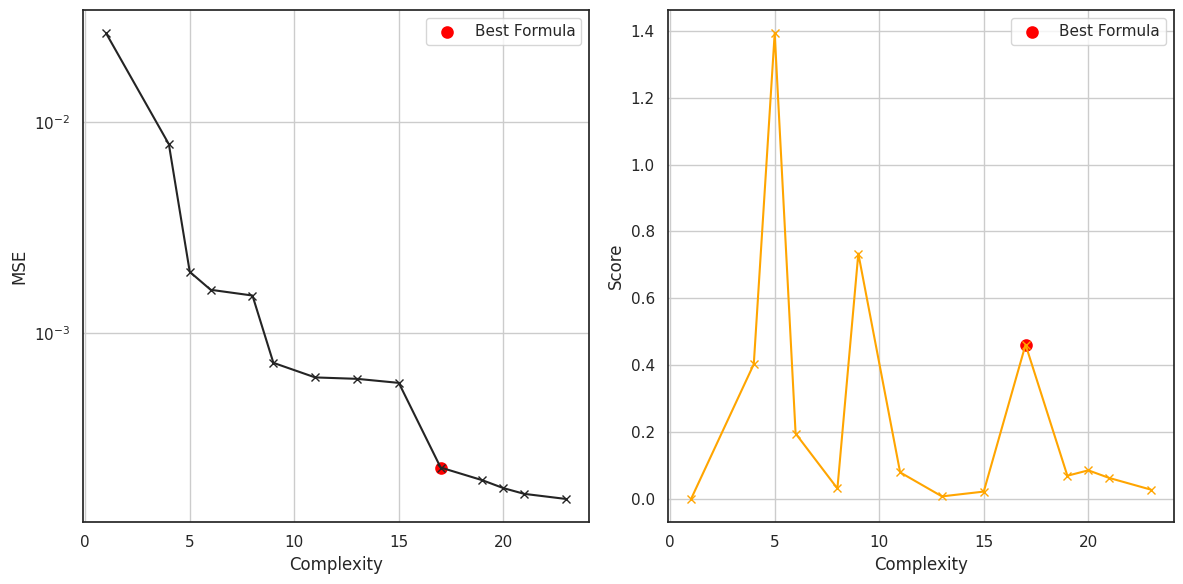

In [ ]:
# Отрисовка графиков зависимости loss и score от complexity
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

index_value = model_sigma.get_best().name

### complexity - мера сложности формулы, учитывающая количество операторов, функций и констант в уравнении
### score - комбинированная метрика, которая учитывает точность формулы и её сложность

# График зависимости loss от complexity
axs[0].plot(model_sigma.equations_['complexity'], model_sigma.equations_['loss'], marker='x')
axs[0].set_xlabel('Complexity')
axs[0].set_ylabel('MSE')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[0].scatter(model_sigma.equations_['complexity'].iloc[index_value],
                model_sigma.equations_['loss'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

# График зависимости score от complexity
axs[1].plot(model_sigma.equations_['complexity'], model_sigma.equations_['score'], marker='x', color='orange')
axs[1].set_xlabel('Complexity')
axs[1].set_ylabel('Score')
axs[1].set_yscale('linear')
axs[1].grid(True)

axs[1].scatter(model_sigma.equations_['complexity'].iloc[index_value],
                model_sigma.equations_['score'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

axs[0].legend()
axs[1].legend()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

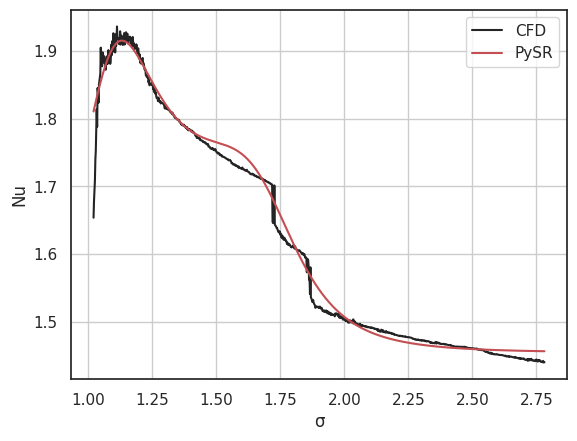

In [ ]:
# Отрисовка графиков зависимости Nu от σ
#print(model_sigma.equations_)
#print(model_sigma.equations_.index)

X_plot = data2_S_pd.values.reshape(-1, 1)

# Получение предсказаний модели:
y_pred = model_sigma.predict(X_plot)

plt.plot(data2_S_pd, data2_Nu_pd, label='CFD')
plt.plot(data2_S_pd, y_pred, label='PySR', c='r')
plt.ylabel('Nu')
plt.xlabel('σ')
plt.legend()
plt.grid(True)
plt.show()

Оптимальная конфигурация и формула с учетом вычислительных затрат.

**Логарифм от исходных данных**

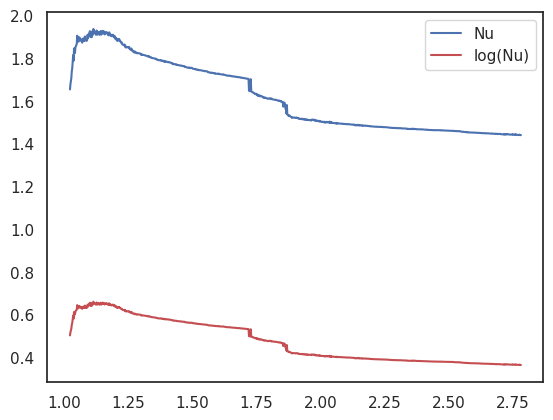

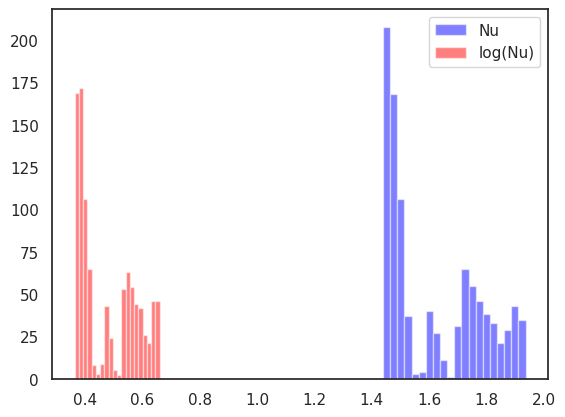

In [ ]:
data2_Nu_log = np.log(data2_Nu)

plt.plot(data2_S, data2_Nu, c='b', label='Nu')
plt.plot(data2_S, data2_Nu_log, c='r', label='log(Nu)')
plt.legend()

plt.figure()
plt.hist(data2_Nu, color='blue', bins=20, alpha=0.5, label='Nu')
plt.hist(data2_Nu_log, color='red', bins=20, alpha=0.5, label='log(Nu)')
plt.legend();

###GPLearn

In [19]:
data_Nu_pd = pd.DataFrame(data2['Nu_sum'])
data_S_pd = pd.DataFrame(data2['σ'])

In [20]:
function_set = ['add', 'sub', 'mul', 'div', 'log', 'sqrt', 'sin', 'cos']

model_gp = SymbolicRegressor(population_size=4000, tournament_size=50, init_depth=(2,10),
                           generations=100, stopping_criteria=5e-4,
                           p_crossover=0.5, p_subtree_mutation=0.3,
                           p_hoist_mutation=0.01, p_point_mutation=0.19,
                           max_samples=0.9, verbose=1, function_set=function_set,
                           parsimony_coefficient=7e-5, metric='rmse', random_state=994,
                           const_range = (-10, 10), )


model_gp.fit(data_S_pd.values, np.ravel(data_Nu_pd.values))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    54.71           112.79        7        0.0905191        0.0799585     19.38m
   1    26.84          1.88162       29        0.0514989        0.0580486     14.67m
   2    21.03           1.3624       16        0.0414639        0.0381157      7.78m
   3    22.34          1.08331       29        0.0379185        0.0327412      7.75m
   4    24.62          1.00441       28        0.0355662        0.0344748      9.73m
   5    25.90          1.33843       46        0.0295597        0.0356468      8.26m
   6    26.73         0.809123       46        0.0296038        0.0353191      9.55m
   7    31.55         0.513286       47        0.0288493        0.0255652      8.41m
   8    35.12         0.492348       47        0.0270115        0.0396029  

SymbolicRegressor(const_range=(-10, 10),
                  function_set=['add', 'sub', 'mul', 'div', 'log', 'sqrt',
                                'sin', 'cos'],
                  generations=100, init_depth=(2, 10), max_samples=0.9,
                  metric='rmse', p_crossover=0.5, p_point_mutation=0.19,
                  p_subtree_mutation=0.3, parsimony_coefficient=7e-05,
                  population_size=4000, random_state=994,
                  stopping_criteria=0.0005, tournament_size=50, verbose=1)

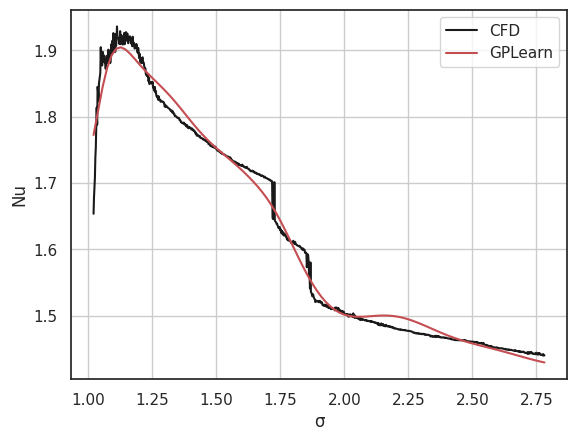

In [21]:
plt.plot(data_S_pd, data_Nu_pd, label='CFD', c='k')

X_train, X_test, y_train, y_test = train_test_split(data_S_pd.values, data_Nu_pd.values, test_size=0.1, random_state=1)


X = np.linspace(data_S_pd.values.min(), data_S_pd.values.max(), 100)
Y = model_gp.predict(X[:, np.newaxis])
plt.plot(X, Y, label='GPLearn', c='r')

plt.legend()
plt.ylabel('Nu', fontsize=12)
plt.xlabel('σ', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Нет смысла искать формулу для log(Nu): значения по форме распределены так же, как и для Nu (зависимость не степенная).

## 3.3. Термогравитационное течение воздуха через двухрядный пучок труб

## **Исходные данные**

### QLattice

In [46]:
data3_Nu = data3_Nu_pd.values[:,0]
data3_Feat = data3_Feat_pd.values

In [ ]:
# Создание экземпляра класса
ql = feyn.QLattice(random_seed=14)

# Определение списков для моделей и потерь
models = []
loss_history3_ql = []

# Задание количества эпох
n_epochs = 20

# Вычисление исходной вероятности на основе входных данных
priors = feyn.tools.estimate_priors(data3, 'Nu_sum')

# Обновление вероятностей
ql.update_priors(priors)

for epoch in range(n_epochs):
    # Отбор новых образцов моделей и добавление их в список
    models += ql.sample_models(data3.columns, 'Nu_sum', 'regression')

    # Обучение отобранных моделей на данных
    # Возвращается список, отсортированный по потерям
    models = feyn.fit_models(models, data3, 'squared_error')

    # Удаление плохих моделей
    models = feyn.prune_models(models)

    # Предсказание лучшей модели
    pred = models[0].predict(data3_Feat_pd)

    # Потери для лучшей модели
    loss_history3_ql.append(mean_squared_error(data3_Nu, pred))
    print(f'Epoch = {epoch+1}, MSE: {loss_history3_ql[-1]}')

    # Обновление моделей в соответствии с новыми отсортированными образцами
    ql.update(models)

# 10 лучших и достаточно разных моделей
best_models3 = feyn.get_diverse_models(models, n=10)

Epoch = 1, MSE: 3.243478417075125
Epoch = 2, MSE: 2.6042073652013804
Epoch = 3, MSE: 1.6644187517246176
Epoch = 4, MSE: 1.569136991850552
Epoch = 5, MSE: 0.9809776681373498
Epoch = 6, MSE: 0.9684303395651531
Epoch = 7, MSE: 0.9732060527026347
Epoch = 8, MSE: 0.8419084384280409
Epoch = 9, MSE: 0.835493433150991
Epoch = 10, MSE: 0.8213907245266375
Epoch = 11, MSE: 0.8060629999609344
Epoch = 12, MSE: 0.7201157307276859
Epoch = 13, MSE: 0.7197850092734284
Epoch = 14, MSE: 0.6450131349577198
Epoch = 15, MSE: 0.6316991252381167
Epoch = 16, MSE: 0.6238541009996476
Epoch = 17, MSE: 0.6198096231836567
Epoch = 18, MSE: 0.6204613205647563
Epoch = 19, MSE: 0.6271897093655348
Epoch = 20, MSE: 0.6234773678569665


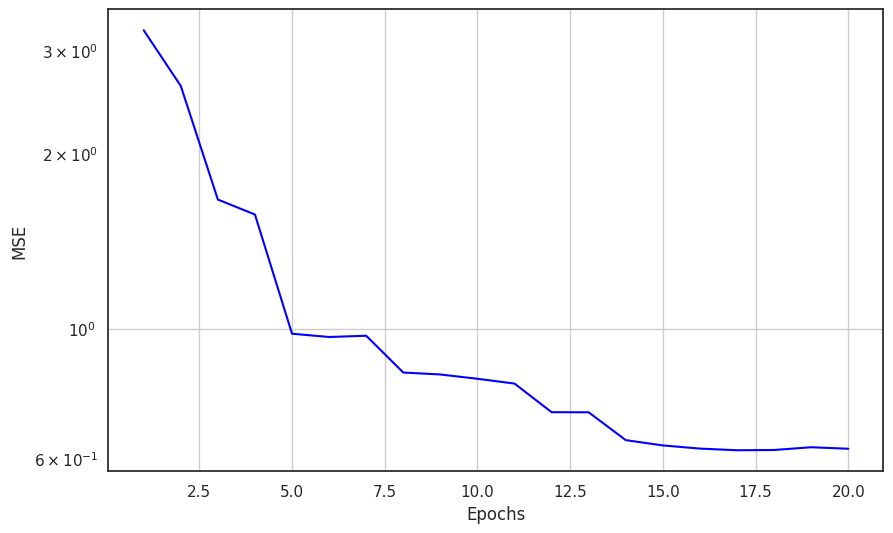

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_history3_ql)+1), loss_history3_ql, color="blue")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
for i, model in enumerate(best_models3):
  sympy_model = model.sympify(signif=3)
  print('Model',i,':', sympy_model)

Model 0 : 11.3 - 12.1*tanh(0.428*σ - (0.0712*H/d + 1.11)*tanh(2.84*εT + 0.545) - tanh(29.4*s/d - 1.18) + 1.61)
Model 1 : 24.7*exp(-0.252*(σ - 0.487)**2 - 4.6*(-0.0192*H/d + 0.659*tanh(101.0*(0.112 - s/d)**2) - 0.659*tanh(2.78*εT + 0.761) + 1)**2) - 0.607
Model 2 : -24.4*tanh((-0.0565*H/d - 0.575)*(2.9*εT + 0.607)*exp(-227.0*(s/d - 0.113)**2 - 0.368*(-εT - 0.528*σ - 0.177)**2)) - 2.39
Model 3 : -10.9*(-0.0753*H/d - 1.55)*(0.847*(1 - 0.622*σ)**2 + exp(-1.32*(0.617 - εT)**2 - 156.0*(s/d - 0.112)**2)) - 6.23
Model 4 : -15.8*(0.459*σ + 1.58*exp(5.37*σ - 6.69*(εT + 0.207)**2) - 2.59)*exp(-137.0*(0.111 - s/d)**2 - 0.582*(0.0421*H/d - 1)**2) - 6.71
Model 5 : -3.7*σ + 25.7*exp(-1.7*(0.606 - εT)**2 - 2.0*tanh((2.14 - 0.109*H/d)*tanh(15.4*s/d - 1.66))**2) + 2.36
Model 6 : 15.8*(-14.5*s/d - 0.438*σ + 4.08)*exp(-1.08*(εT - 0.606)**2 - 2.34*(-0.245*(-0.0518*H/d - 1.21)*(16.9*s/d + 0.0741) - 1)**2) - 8.73
Model 7 : 47.8*exp(-113.0*(0.0951 - s/d)**2 - 1.38*(εT - 0.608)**2)*tanh(exp(-49.0*(s/d - 0.153)

In [ ]:
best3_ql = best_models3[0]
sympy_model = best3_ql.sympify(signif=3)
sympy_model.as_expr()

11.3 - 12.1*tanh(0.428*σ - (0.0712*H/d + 1.11)*tanh(2.84*εT + 0.545) - tanh(29.4*s/d - 1.18) + 1.61)

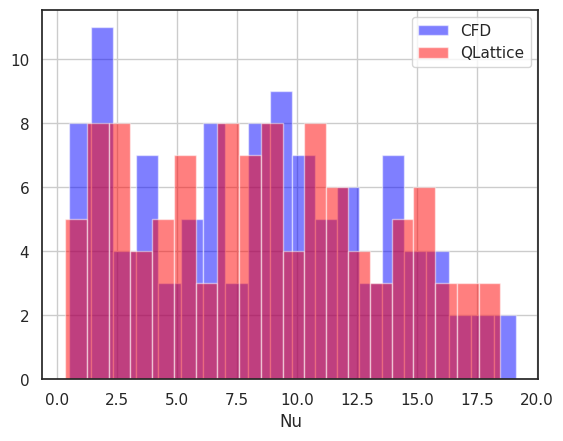

In [ ]:
plt.hist(data3_Nu, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(best3_ql.predict(data3_Feat_pd), label='QLattice', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

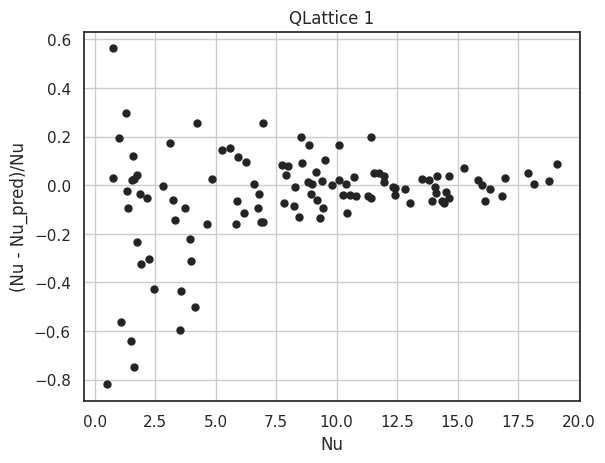

In [ ]:
rel_err = (data3_Nu - best3_ql.predict(data3_Feat_pd))/data3_Nu
plt.scatter(data3_Nu,rel_err,s=25)
plt.title('QLattice 1')
plt.xlabel('Nu')
plt.ylabel('(Nu - Nu_pred)/Nu')
plt.grid(True);

In [ ]:
best3_ql2 = best_models3[2]
sympy_model = best3_ql2.sympify(signif=3)
sympy_model.as_expr()

-24.4*tanh((-0.0565*H/d - 0.575)*(2.9*εT + 0.607)*exp(-227.0*(s/d - 0.113)**2 - 0.368*(-εT - 0.528*σ - 0.177)**2)) - 2.39

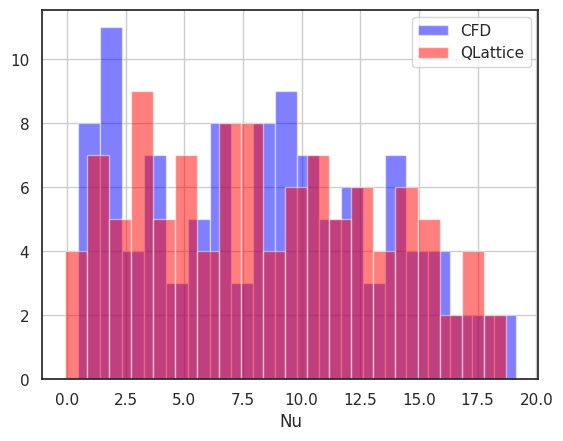

In [ ]:
plt.hist(data3_Nu, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(best3_ql2.predict(data3_Feat_pd), label='QLattice', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

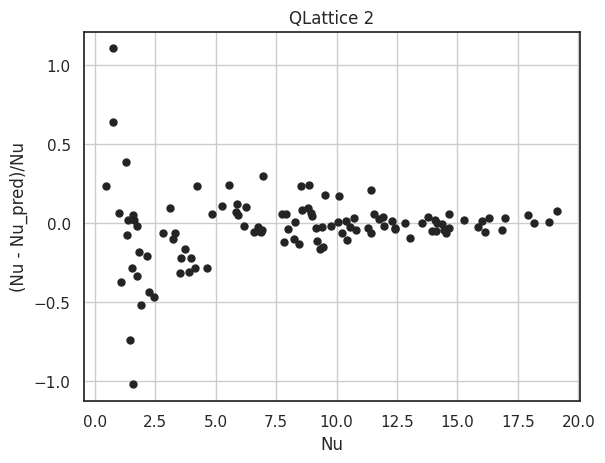

In [ ]:
rel_err = (data3_Nu - best3_ql2.predict(data3_Feat_pd))/data3_Nu
plt.scatter(data3_Nu,rel_err,s=25)
plt.title('QLattice 2')
plt.xlabel('Nu')
plt.ylabel('(Nu - Nu_pred)/Nu')
plt.grid(True);

**SHAP (для Nu)**

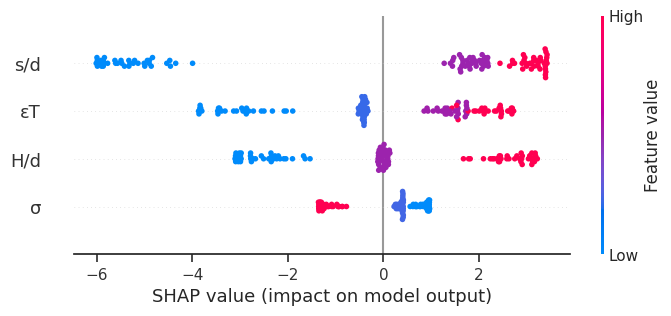

In [ ]:
explainer_ebm = shap.Explainer(best3_ql.predict, data3_Feat_pd)
shap_values_ebm = explainer_ebm(data3_Feat_pd)
shap.plots.beeswarm(shap_values_ebm)

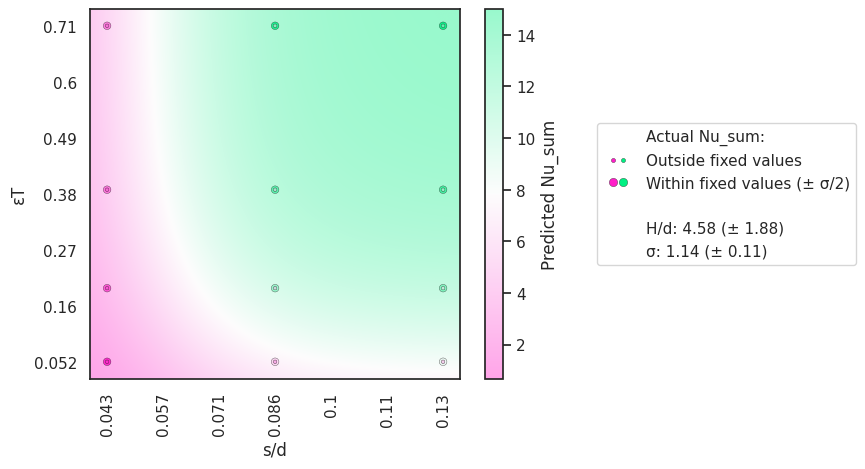

In [ ]:
best3_ql.plot_response_2d(
    data=data3,
    fixed={
        'H/d': data3['H/d'].median(),
        'σ': data3['σ'].median()
    }
)

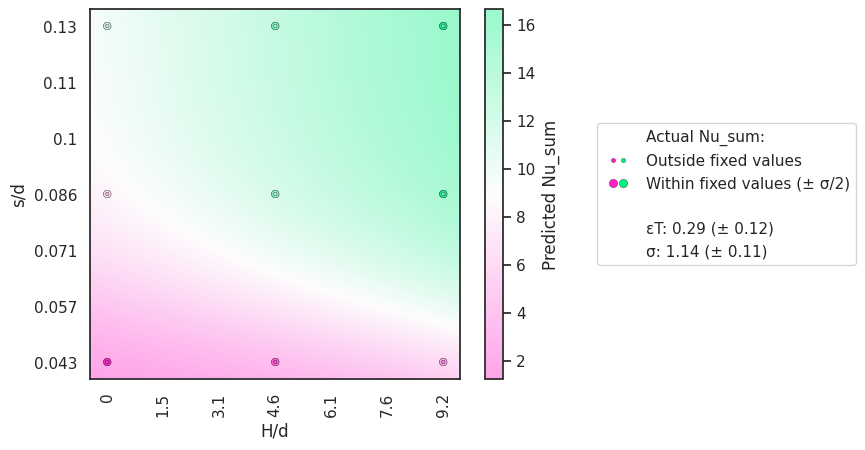

In [ ]:
best3_ql.plot_response_2d(
    data=data3,
    fixed={
        'εT': data3['εT'].median(),
        'σ': data3['σ'].median()
    }
)

### PySR

In [67]:
X_shaft = data3_Feat_pd.values
y_shaft = data3_Nu_pd.values

PySR не поддерживает такие символы, как σ, а также в явном виде не дает задавать в названиях переменных / * и другие символы, поэтому решено было использовать обозначение s == σ, k == s/d, H == h/d, eT == T.

In [ ]:
model_shaft = PySRRegressor(
    random_state=42,     # для воспроизведения результатов
    deterministic=True,
    parallelism='serial',
    maxsize=30,          # максимальный размер формул
    niterations=150,     # число итераций эволюции
    population_size=35,  # размер популяции
    parsimony=0.000001,  # штраф за сложность
    binary_operators=["+", "-", "*", "/"],
    unary_operators=[
        "exp",
        "square",
        "sqrt",
        "tanh",
        "cos",
    ],
    constraints={
        "exp": 1,
        "cos": 1,
        "tanh": 1,
    },
    nested_constraints={
        "exp": {"exp": 0},
        "square": {"square": 0},
    },
)

model_shaft.fit(X_shaft, y_shaft, variable_names=["s", "k", "h", "T"])

print(model_shaft)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
INFO:pysr.sr:Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 5.810e+04
Progress: 240 / 4650 total iterations (5.161%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.511e+01  1.594e+01  y = 8.4003
3           1.299e+01  3.296e-01  y = k * 98.393
5           1.166e+01  5.416e-02  y = (h + 93.815) * k
8           1.162e+01  1.001e-03  y = square((k * 14.392) + (T + 1.1051))
10          9.300e+00  1.115e-01  y = square(((T + 1.7646) / 0.24669) + 1.3439) * k
13          5.926e+00  1.502e-01  y = (((k + k) * (h + 15.302)) + -0.030276) * (T - -2.1832)
15          4.764e+00  1.092e-01  y = (k + ((h + 11.527) * ((k + (k * T)) / 0.22216))) + k
17          4.762e+00  1.458e-04  y = ((k + ((h + 11.527) * ((k + (k * T)) / 0.22216))) + k)...
                                       + -0.12642
23          4.463e+00  1.08

In [68]:
drive.mount('/content/drive')
model_shaft = PySRRegressor.from_file(
    run_directory="/content/drive/My Drive/Python ML/Models_PySR/model_termo_1/",
)
drive.flush_and_unmount()

Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_termo_1/checkpoint.pkl...
INFO:pysr.sr:Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_termo_1/checkpoint.pkl...


Mounted at /content/drive


In [69]:
# Лучшая функция
rounded_expr = model_shaft.sympy().evalf(n=5)
#print(rounded_expr)
rounded_expr.as_expr()

4787.1*(k - 0.21613)**2*(k*(T + 4.6197) - 0.14538 + 0.014453*(h + 3.6093)/s - 0.0042205/T)**2

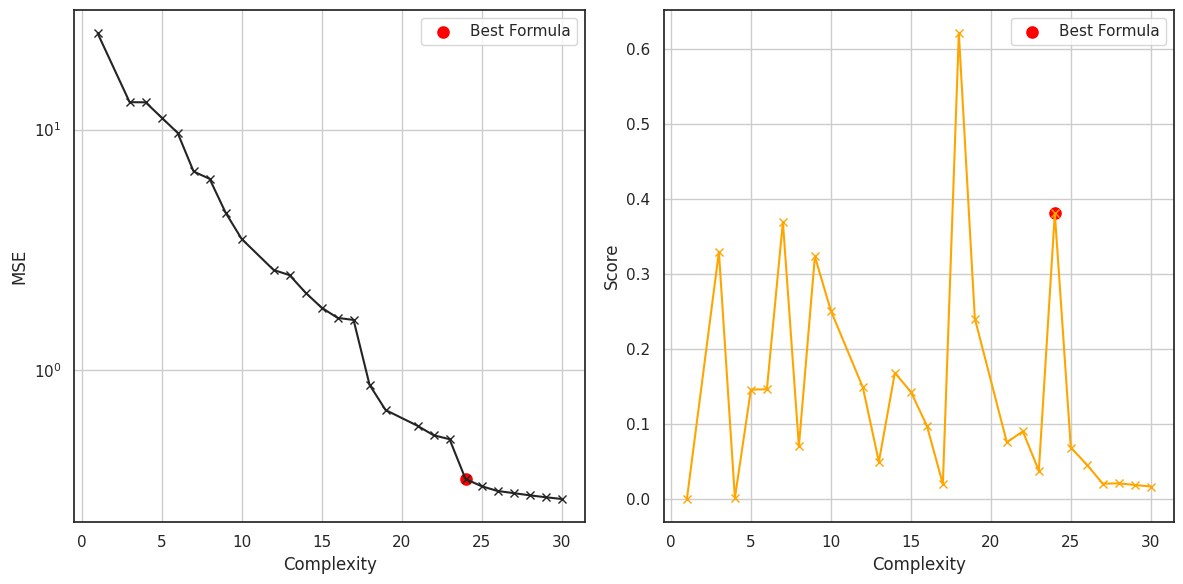

In [50]:
# Отрисовка графиков зависимости loss и score от complexity
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

index_value = model_shaft.get_best().name

### complexity - мера сложности формулы, учитывающая количество операторов, функций и констант в уравнении
### score - комбинированная метрика, которая учитывает точность формулы и её сложность

# График зависимости loss от complexity
axs[0].plot(model_shaft.equations_['complexity'], model_shaft.equations_['loss'], marker='x')
axs[0].set_xlabel('Complexity')
axs[0].set_ylabel('MSE')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[0].scatter(model_shaft.equations_['complexity'].iloc[index_value],
                model_shaft.equations_['loss'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

# График зависимости score от complexity
axs[1].plot(model_shaft.equations_['complexity'], model_shaft.equations_['score'], marker='x', color='orange')
axs[1].set_xlabel('Complexity')
axs[1].set_ylabel('Score')
axs[1].set_yscale('linear')
axs[1].grid(True)

axs[1].scatter(model_shaft.equations_['complexity'].iloc[index_value],
                model_shaft.equations_['score'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

axs[0].legend()
axs[1].legend()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

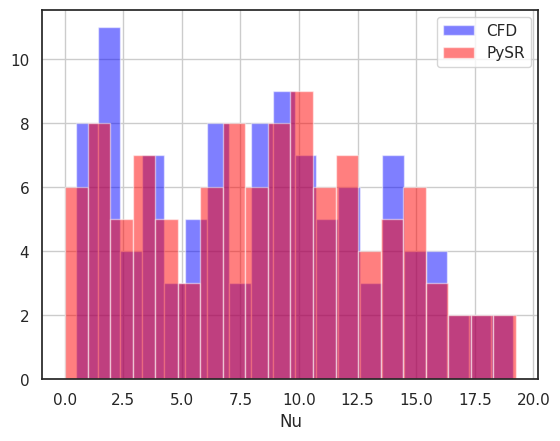

In [52]:
# Отрисовка гистограммы Nu
plt.hist(y_shaft, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(model_shaft.predict(X_shaft), label='PySR', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

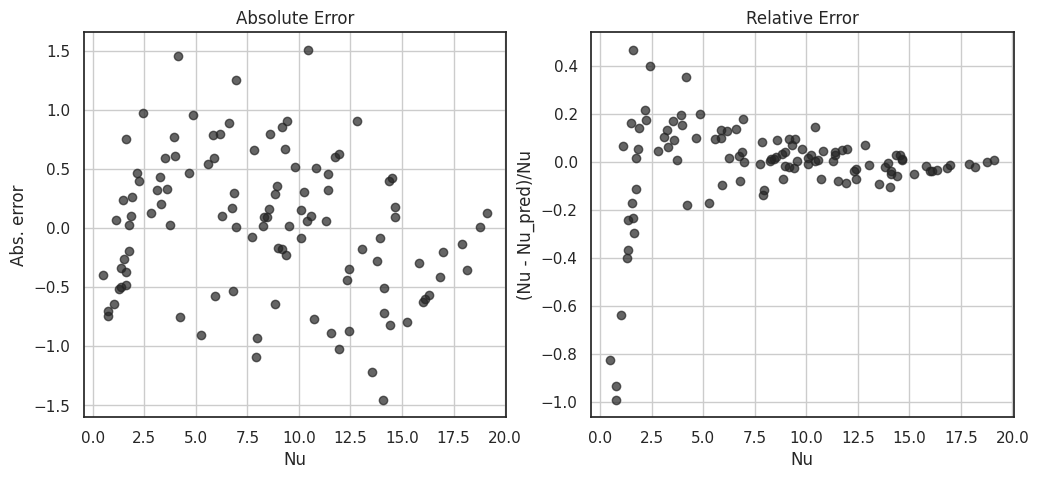

In [53]:
# Построение графиков зависимости ошибок от Nu
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

y_pred = model_shaft.predict(X_shaft)

# Истинные значения
y_true = y_shaft.flatten() # преобр в форму (N,)

# Вычисляем ошибки
abs_error = y_pred - y_true
rel_error = (abs_error / y_true)

# График абсолютных ошибок
axs[0].scatter(y_true, abs_error, alpha=0.7)
axs[0].set_xlabel('Nu')
axs[0].set_ylabel('Abs. error')
axs[0].set_title('Absolute Error')
axs[0].grid(True)

# График относительных ошибок
axs[1].scatter(y_true, rel_error, alpha=0.7)
axs[1].set_xlabel('Nu')
axs[1].set_ylabel('(Nu - Nu_pred)/Nu')
axs[1].set_title('Relative Error')
axs[1].grid(True)

plt.show()

### SHAP (для Nu) при использовании PySR

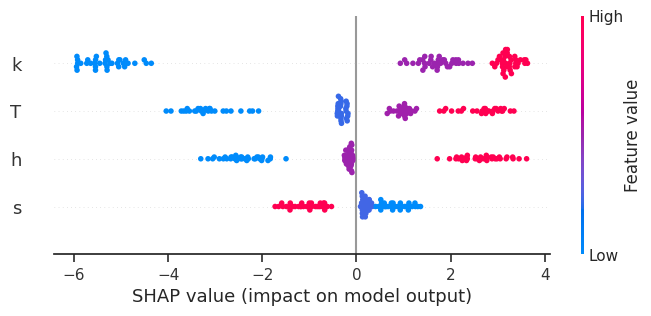

In [72]:
data3_Feat_renamed = data3_Feat_pd.copy()
data3_Feat_renamed.columns = ['s','k','h','T']
explainer_ebm = shap.Explainer(model_shaft.predict, data3_Feat_renamed)
shap_values_ebm = explainer_ebm(data3_Feat_renamed)
shap.plots.beeswarm(shap_values_ebm)

###GPLearn


In [22]:
data_Nu_pd = pd.DataFrame(data3['Nu_sum'])
data_Feat_pd = pd.DataFrame(data3[['σ','s/d','H/d','εT']])


In [23]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', dtanh]

model_gp = SymbolicRegressor(population_size=500, tournament_size=50, init_depth=(5,8),
                           generations=100, stopping_criteria=5e-4,
                           p_crossover=0.5, p_subtree_mutation=0.3,
                           p_hoist_mutation=0.01, p_point_mutation=0.19,
                           max_samples=0.9, verbose=1, function_set=function_set,
                           parsimony_coefficient=1e-2, metric='rmse', random_state=2904,
                           const_range = (-100, 100), )


model_gp.fit(data_Feat_pd.values, np.ravel(data_Nu_pd.values))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    45.88           123718        9          4.86132          6.90466     58.15s
   1    21.24          22.6992       46          4.44113          4.43716     45.98s
   2    20.43          37.2307       46          4.01749          1.56835      1.03m
   3    32.39          198.699       46          3.68012          5.03591      1.27m
   4    41.06          36.4727       55          3.39163          4.29772      1.31m
   5    44.54          55.9258       48          2.74423          2.81742      1.21m
   6    48.77          5.94421       48          2.43783          2.76406     55.87s
   7    50.65          6.30363       42          1.95206          1.66512     54.49s
   8    46.23          42.9267       42          1.86881          2.49775  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sqrt',
                                <gplearn.functions._Function object at 0x7a8c1b657e90>],
                  generations=100, init_depth=(5, 8), max_samples=0.9,
                  metric='rmse', p_crossover=0.5, p_point_mutation=0.19,
                  p_subtree_mutation=0.3, parsimony_coefficient=0.01,
                  population_size=500, random_state=2904,
                  stopping_criteria=0.0005, tournament_size=50, verbose=1)

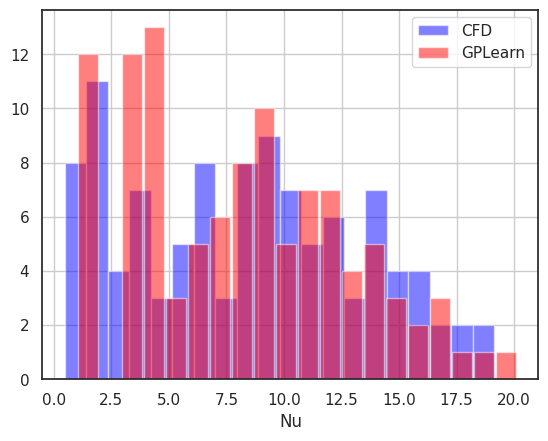

In [24]:
plt.hist(data_Nu_pd, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(model_gp.predict(data_Feat_pd), label='GPLearn', color='red', bins=20, alpha=0.5, rwidth=0.9)
plt.xlabel('Nu', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

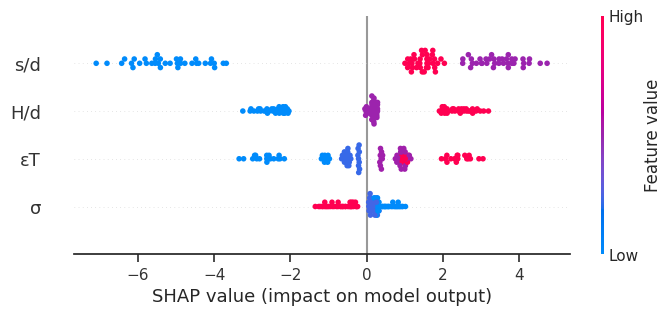

In [25]:
explainer = shap.Explainer(model_gp.predict, data_Feat_pd)

shap_values = explainer(data_Feat_pd)

shap.plots.beeswarm(shap_values)

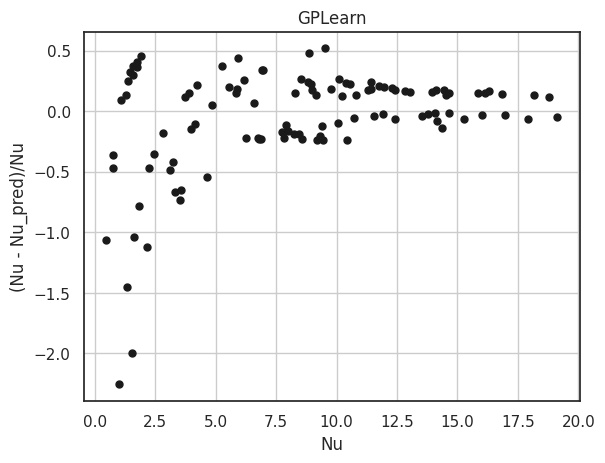

In [26]:
rel_err = (np.ravel(data_Nu_pd.values) - model_gp.predict(data_Feat_pd))/data_Nu_pd.values[:, 0]
plt.scatter(np.ravel(data_Nu_pd.values),np.ravel(rel_err),s=25, c='k')
plt.title('GPLearn')
plt.xlabel('Nu', fontsize=12)
plt.ylabel('(Nu - Nu_pred)/Nu', fontsize=12)
plt.grid(True)

### PyKAN

In [ ]:
torch.set_default_dtype(torch.float64)

# width - задает количество слоев (количество элементов списка) и число нейронов
# в каждом слое (первый слой содержит столько же нейронов, скольо имеется
# признаков, последний столько, сколько имеется выходных переменных);
# grid - размер сетки B-сплайнов, аппроксимирующих функцию активации;
# k - степень сплайна;
# seed - число для повторяемости результатов
data3_kan = KAN(width=[4,3,1], grid=3, k=3, seed=38)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
dataset = {}
dataset['train_input'] = torch.tensor(data3_Feat)
dataset['train_label'] = torch.tensor(data3_Nu.reshape(-1,1))
dataset['test_input'] = torch.tensor(data3_Feat)
dataset['test_label'] = torch.tensor(data3_Nu.reshape(-1,1))
print(dataset['train_input'].shape, dataset['train_label'].shape)

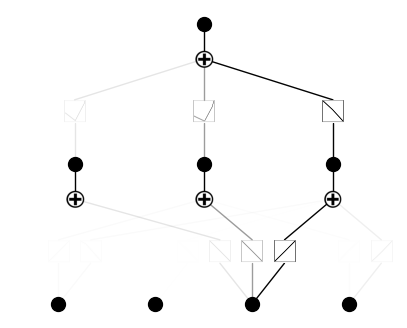

In [ ]:
# Вид инициализированной сети
data3_kan(dataset['train_input'])
data3_kan.plot()

In [ ]:
# Обучение модели:
# dataset - обучающие данные;
# opt - алгоритм оптимизации ('LBFGS'/'Adam');
# steps - количество итераций;
# lamb - параметр регуляризации (если 0, то регуляризация не осуществляется)
data3_kan.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 2.47e-01 | test_loss: 2.47e-01 | reg: 2.91e+01 | : 100%|█| 50/50 [00:14<00:00,  3.50it

saving model version 0.1


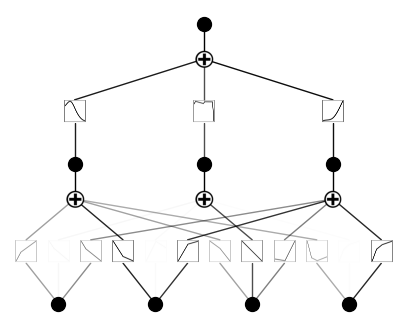

In [ ]:
# Вид сети после первого этапа обучения
data3_kan.plot()

saving model version 0.2


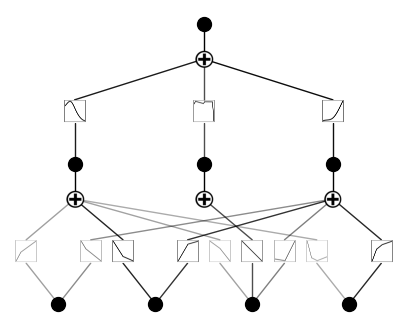

In [ ]:
# prune - удаление слабых связей (нейроны без связей пропадают),
# что позволяет упростить модель
data3_kan = data3_kan.prune()
data3_kan.plot()

In [ ]:
data3_kan.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 5.00e-01 | test_loss: 5.00e-01 | reg: 2.65e+01 | : 100%|█| 50/50 [00:10<00:00,  4.95it

saving model version 0.3


In [ ]:
# refine(n) - переход от исходной сетки к сетке с
# размером n для улучшения модели
data3_kan = data3_kan.refine(10)

saving model version 0.4


In [ ]:
data3_kan.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 5.10e-01 | test_loss: 5.10e-01 | reg: 2.32e+01 | : 100%|█| 50/50 [00:11<00:00,  4.46it

saving model version 0.5


In [ ]:
lib = ['x','x^2','x^3','x^4','exp','sqrt','sin','abs']
# Автоматическая замена сплайнов на аналитические (символьные)
# функции из списка lib
data3_kan.auto_symbolic(lib=lib)

fixing (0,0,0) with x^2, r2=0.9999981086843964, c=2
fixing (0,0,1) with 0
fixing (0,0,2) with x^2, r2=0.999999987721677, c=2
fixing (0,1,0) with x^2, r2=0.9999987618281712, c=2
fixing (0,1,1) with 0
fixing (0,1,2) with x^2, r2=0.9999989853555249, c=2
fixing (0,2,0) with x^2, r2=0.9999999955613893, c=2
fixing (0,2,1) with x, r2=0.9999729540987734, c=1
fixing (0,2,2) with x^2, r2=0.9999999999077068, c=2
fixing (0,3,0) with exp, r2=0.9937561188273525, c=2
fixing (0,3,1) with 0
fixing (0,3,2) with exp, r2=0.9965107513241896, c=2
fixing (1,0,0) with x, r2=0.7184287080036232, c=1
fixing (1,1,0) with x^2, r2=0.9999999985160274, c=2
fixing (1,2,0) with sin, r2=0.9997936507028972, c=2
saving model version 0.6


In [ ]:
pykan_loss = data3_kan.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 7.55e-01 | test_loss: 7.55e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [00:21<00:00,  2.31it

saving model version 0.7


In [ ]:
from kan.utils import ex_round
# Отображение формулы с количеством десятичных знаков - 4
ex_round(data3_kan.symbolic_formula()[0][0],4)

-956.7032*(0.1032 - x_2)**2 - 2.7643*(1 - 0.6585*x_1)**2 - 0.2164*(1 - 0.1419*x_3)**2 - 0.2863*(0.2305*x_3 - 1)**2 - 13.9231*sin(82.7998*(0.126 - x_2)**2 - 1.192*(1 - 0.3684*x_1)**2 - 0.4098*(-0.0542*x_3 - 1)**2 + 1.2024 + 0.8221*exp(-5.602*x_4)) + 18.0796 + 0.6228*exp(-7.3992*x_4)

In [ ]:
kan_predicted = data3_kan(dataset['test_input'])
print(kan_predicted[::10])

tensor([[ 0.3087],
        [ 3.1122],
        [ 7.4430],
        [10.5700],
        [ 6.9915],
        [13.3661],
        [10.3500],
        [14.8033],
        [ 8.8499],
        [ 0.9898],
        [ 3.4371]], grad_fn=<SliceBackward0>)


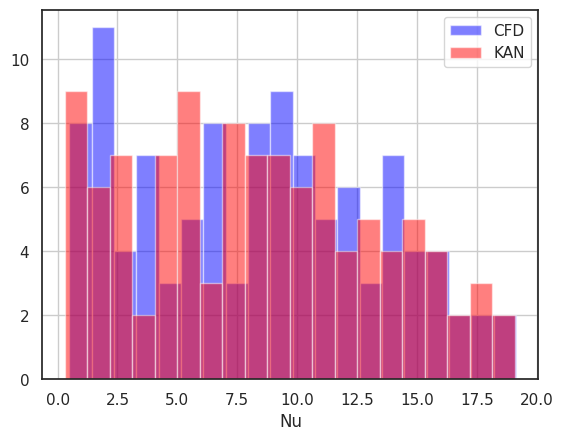

In [ ]:
plt.hist(data3_Nu, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(kan_predicted.detach().numpy()[:,0], label='KAN', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

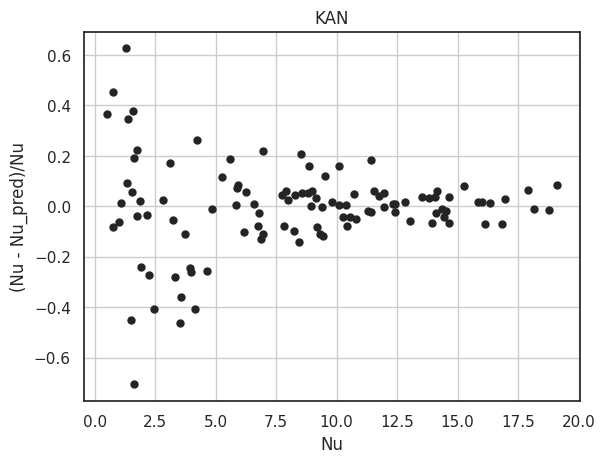

In [ ]:
rel_err = (data3_Nu - kan_predicted.detach().numpy()[:,0])/data3_Nu
plt.scatter(data3_Nu,rel_err,s=25)
plt.title('KAN')
plt.xlabel('Nu')
plt.ylabel('(Nu - Nu_pred)/Nu')
plt.grid(True);

###GBR (gradient boosted regressor)

In [38]:
X_train = data3[['σ','s/d','H/d','εT']]

Y_train = data3['Nu_sum']

In [39]:
gbr = GradientBoostingRegressor()


loss_history = []

gbr.fit(X_train, Y_train)


for i, y_pred in enumerate(gbr.staged_predict(X_train)):
    loss = mean_squared_error(Y_train, y_pred)
    loss_history.append(loss)

predictions_gbr = gbr.predict(X_train)

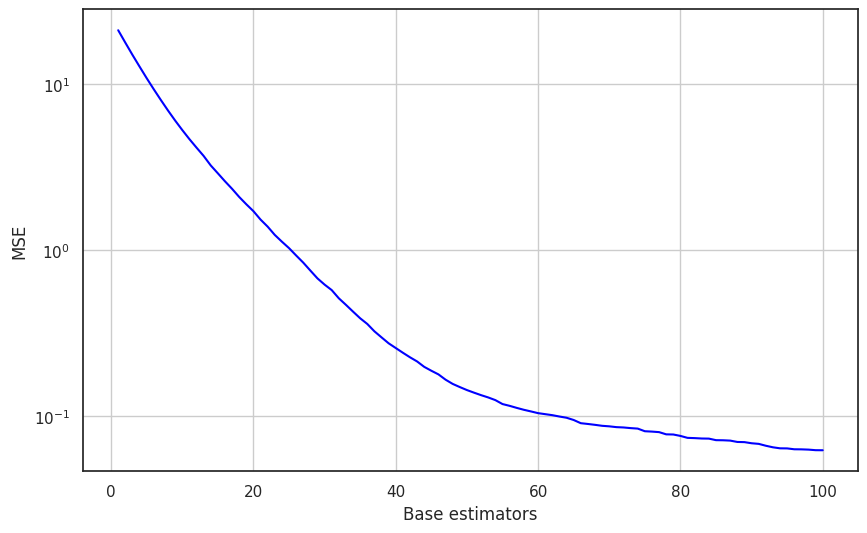

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_history)+1), loss_history, color="blue")
plt.ylabel('MSE')
plt.xlabel('Base estimators')
plt.grid(True)
plt.yscale('log')
plt.show()

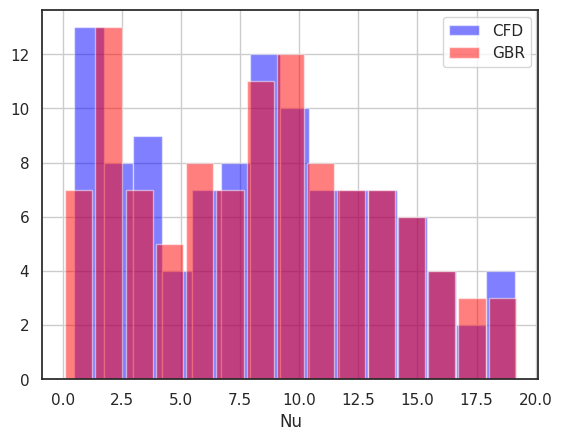

In [41]:
plt.hist(Y_train, label='CFD', color='blue',bins=15, alpha=0.5)
plt.hist(predictions_gbr, label='GBR', color='red', bins=15, alpha=0.5, rwidth=0.9)
plt.xlabel('Nu', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

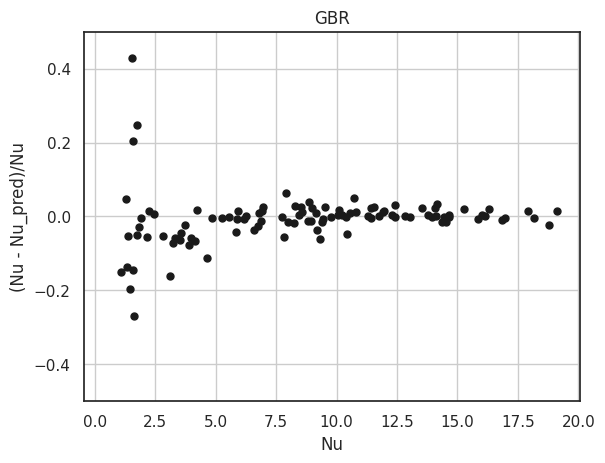

In [44]:
rel_err = (-predictions_gbr+Y_train)/predictions_gbr
plt.scatter(Y_train,np.ravel(rel_err),s=25, c='k')
plt.title('GBR')
plt.xlabel('Nu', fontsize=12)
plt.ylim(-0.5, 0.5)
plt.ylabel('(Nu - Nu_pred)/Nu', fontsize=12)
plt.grid(True)

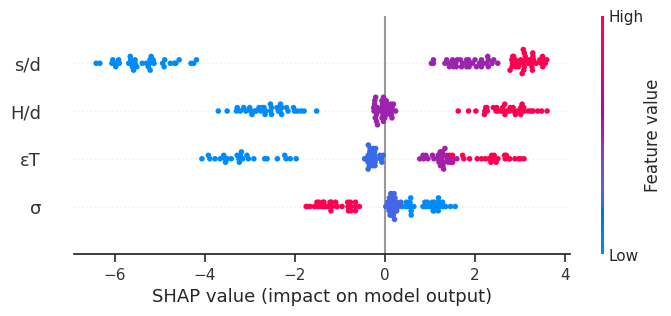

In [43]:
explainer = shap.Explainer(gbr.predict, X_train)

shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

## **Логарифм от исходных данных**

### QLattice

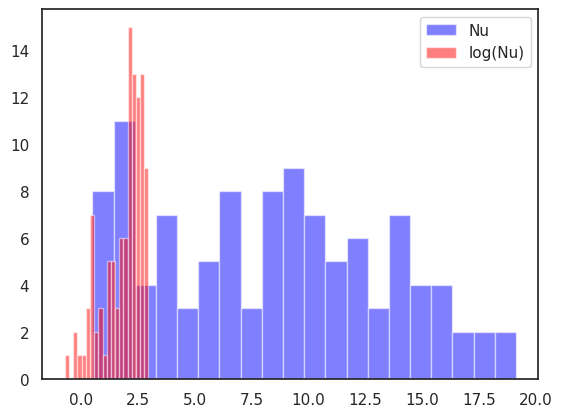

In [ ]:
data3_Nu_log = np.log(data3_Nu)
plt.hist(data3_Nu, color='blue', bins=20, alpha=0.5, label='Nu')
plt.hist(data3_Nu_log, color='red', bins=20, alpha=0.5, label='log(Nu)')
plt.legend();

Распределения Nu и log(Nu) заметно отличаются по форме. Можно попробовать построить модель для логарифма с целью возможного получения более простой формулы.

In [ ]:
data3_log = pd.DataFrame(np.hstack([data3_Feat,data3_Nu_log[:,np.newaxis]]), columns=['σ','s/d','H/d','εT','log(Nu)'])
data3_log.sample(10)

,σ,s/d,H/d,εT,log(Nu)
55,1.14,0.042782,4.577465,0.390165,1.320051
6,1.02,0.128345,0.000000,0.052041,1.766937
36,1.14,0.042782,0.000000,0.052041,-0.279233
83,1.53,0.042782,9.154930,0.196626,1.175492
38,1.14,0.042782,9.154930,0.052041,0.772728
47,1.14,0.042782,9.154930,0.196626,1.579649
77,1.53,0.085563,9.154930,0.052041,2.076128
15,1.02,0.128345,0.000000,0.196626,2.192609
45,1.14,0.042782,0.000000,0.196626,0.316660
26,1.02,0.128345,9.154930,0.390165,2.824581


In [ ]:
# Создание экземпляра класса
ql = feyn.QLattice(random_seed=19)

# Определение списков для моделей и потерь
models = []
loss_history3_ql_log = []

# Задание количества эпох
n_epochs = 50

# Вычисление исходной вероятности на основе входных данных
priors = feyn.tools.estimate_priors(data3_log, 'log(Nu)')

# Обновление вероятностей
ql.update_priors(priors)

for epoch in range(n_epochs):
    # Отбор новых образцов моделей и добавление их в список
    models += ql.sample_models(data3_log.columns,
                               'log(Nu)',
                               'regression'
    )

    # Обучение отобранных моделей на данных
    # Возвращается список, отсортированный по потерям
    models = feyn.fit_models(models, data3_log, 'squared_error')

    # Удаление плохих моделей
    models = feyn.prune_models(models)

    # Предсказание лучшей модели
    pred = models[0].predict(data3_Feat_pd)

    # Потери для лучшей модели
    loss_history3_ql_log.append(mean_squared_error(data3_Nu_log, pred))
    print(f'Epoch = {epoch+1}, MSE: {loss_history3_ql_log[-1]}')

    # Обновление моделей в соответствии с новыми отсортированными образцами
    ql.update(models)

# 10 лучших и достаточно разных моделей
best_models3_log = feyn.get_diverse_models(models, n=10)

Epoch = 1, MSE: 0.055904478861646685
Epoch = 2, MSE: 0.05613047705203008
Epoch = 3, MSE: 0.05694209477318649
Epoch = 4, MSE: 0.046050254024611194
Epoch = 5, MSE: 0.04265709673379833
Epoch = 6, MSE: 0.03891558704713093
Epoch = 7, MSE: 0.03163110044555898
Epoch = 8, MSE: 0.028927137458011246
Epoch = 9, MSE: 0.0291154365465806
Epoch = 10, MSE: 0.026928602378900133
Epoch = 11, MSE: 0.02675816413160754
Epoch = 12, MSE: 0.026174108274108945
Epoch = 13, MSE: 0.025896496921677954
Epoch = 14, MSE: 0.02572612750299694
Epoch = 15, MSE: 0.025903476209342028
Epoch = 16, MSE: 0.025489715305799493
Epoch = 17, MSE: 0.024820990886455264
Epoch = 18, MSE: 0.02489976459058461
Epoch = 19, MSE: 0.024431338665889153
Epoch = 20, MSE: 0.024086949854528413
Epoch = 21, MSE: 0.025448765635180698
Epoch = 22, MSE: 0.023926654200311356
Epoch = 23, MSE: 0.024010516059964356
Epoch = 24, MSE: 0.023936971275919205
Epoch = 25, MSE: 0.02415747624797679
Epoch = 26, MSE: 0.022574126658564977
Epoch = 27, MSE: 0.0239196762658

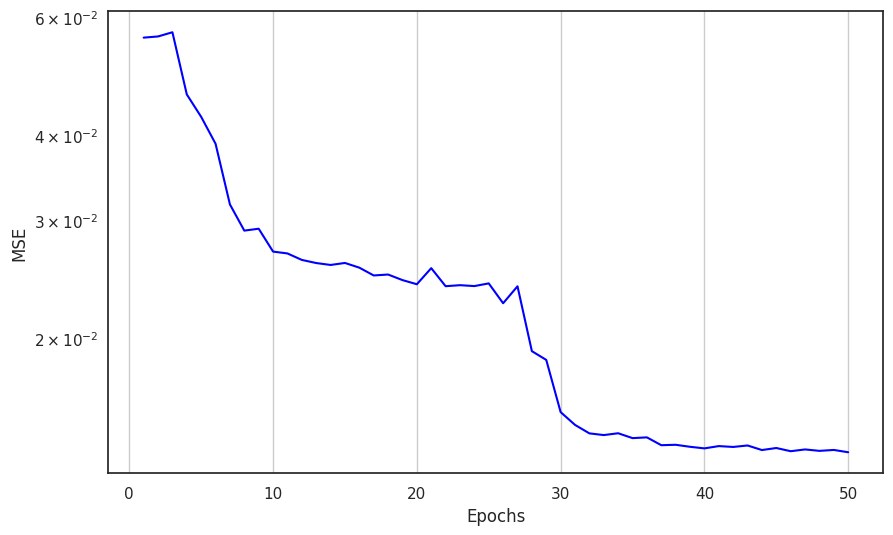

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(loss_history3_ql_log)+1), loss_history3_ql_log, color="blue")
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.grid(True)
plt.yscale('log')
plt.show()

In [ ]:
for i, model in enumerate(best_models3_log):
  sympy_model = model.sympify(signif=3)
  print('Model',i,':', sympy_model)

Model 0 : 6.01*tanh((1.18*εT + 1.02)*((-0.0204*H/d - 0.00495)*(2.18*σ - 4.24) + exp(-1.3*(0.253 - εT)**2 - 157.0*(s/d - 0.115)**2))) - 2.91
Model 1 : 5.99*exp(-0.0804*(1 - 0.056*H/d)**2 - 2.0*exp(-4.0*(0.347*σ - 0.862 + exp(-0.818*(0.131*H/d + 1)**2))**2 - 4.0*exp(-167.0*(0.119 - s/d)**2 - 2.17*(0.555 - εT)**2))) - 2.89
Model 2 : 3.69 - 8.31*exp(-2.0*(0.035*H/d - 0.312*σ + 0.382 + exp(-15.2*(0.147*H/d - 1)**2))**2 - 2.0*exp(-131.0*(s/d - 0.115)**2 - 1.4*(εT - 0.56)**2))
Model 3 : 2.86 - 4.56*exp(-61.2*(0.00344 - s/d)**2 - 1.4*(-0.0624*H/d - 1)**2*(-0.198*σ + exp(-168.0*(s/d - 0.0998)**2 - 2.08*(εT - 0.547)**2) + 0.348)**2)
Model 4 : -3.14*(0.566 - εT)**2 - 0.64*(1.06 - 6.72*s/d)*(-73.6*s/d + (2.81 - 1.19*σ)*(-0.211*H/d - 0.476) + 6.98) + 2.2
Model 5 : 3.11 - 8.17*tanh(exp(-2.0*(exp(-89.8*(0.116 - s/d)**2 - 1.03*(0.56 - εT)**2) + sqrt(exp(-3.26*(0.0317*H/d - 1)**2 - 0.761*(σ - 0.517)**2)))**2))
Model 6 : -0.213*(8.22*s/d - 1.37)*(0.637*H/d + 173.0*s/d + log((0.41 - 8.45*εT)*(2.84*σ - 4.

In [ ]:
best3log_ql = best_models3_log[4]
sympy_model = best3log_ql.sympify(signif=3)
sympy_model.as_expr()

-3.14*(0.566 - εT)**2 - 0.64*(1.06 - 6.72*s/d)*(-73.6*s/d + (2.81 - 1.19*σ)*(-0.211*H/d - 0.476) + 6.98) + 2.2

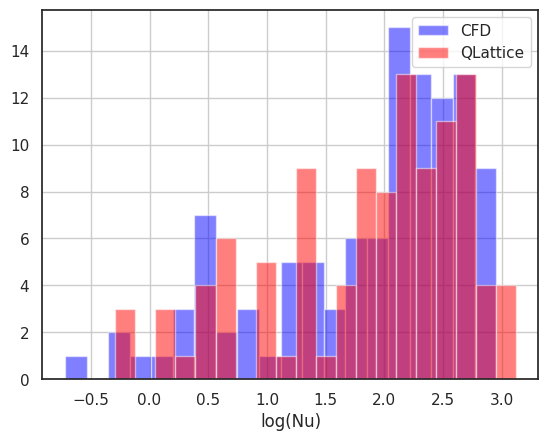

In [ ]:
plt.hist(data3_Nu_log, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(best3log_ql.predict(data3_Feat_pd), label='QLattice', color='red', bins=20, alpha=0.5)
plt.xlabel('log(Nu)')
plt.legend()
plt.grid(True)
plt.show()

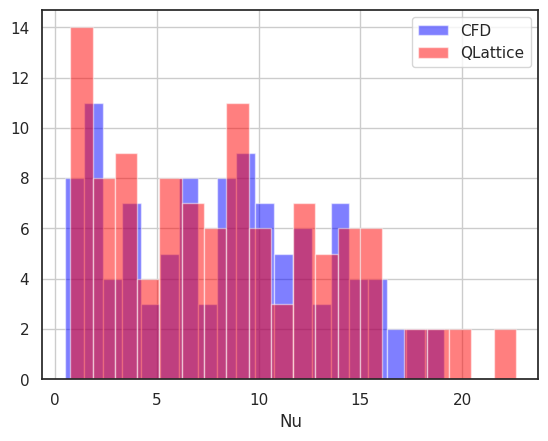

In [ ]:
plt.hist(data3_Nu, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(np.exp(best3log_ql.predict(data3_Feat_pd)), label='QLattice', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

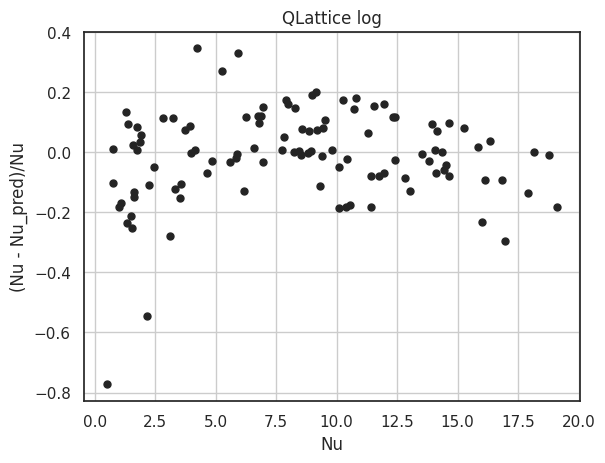

In [ ]:
rel_err = (data3_Nu - np.exp(best3log_ql.predict(data3_Feat_pd)))/data3_Nu
plt.scatter(data3_Nu,rel_err,s=25)
plt.title('QLattice log')
plt.xlabel('Nu')
plt.ylabel('(Nu - Nu_pred)/Nu')
plt.grid(True);

**SHAP (для log(Nu))**

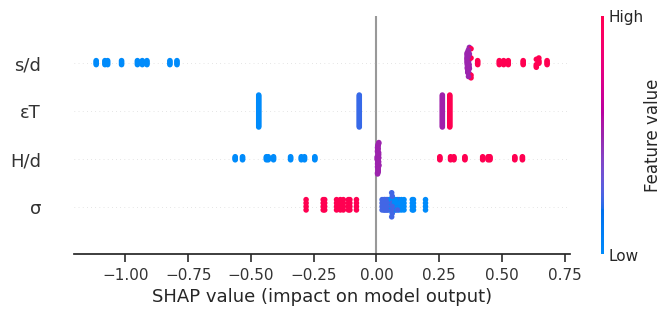

In [ ]:
explainer_ebm = shap.Explainer(best3log_ql.predict, data3_Feat_pd)
shap_values_ebm = explainer_ebm(data3_Feat_pd)
shap.plots.beeswarm(shap_values_ebm)

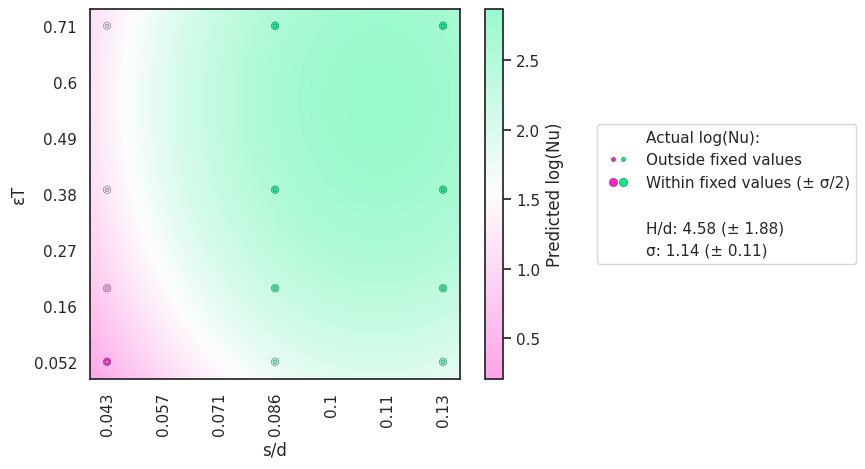

In [ ]:
best3log_ql.plot_response_2d(
    data=data3_log,
    fixed={
        'H/d': data3_log['H/d'].median(),
        'σ': data3_log['σ'].median()
    }
)

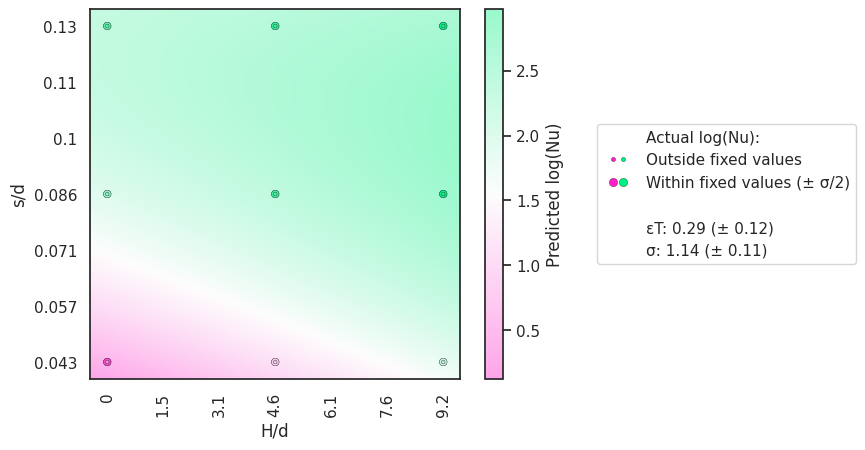

In [ ]:
best3log_ql.plot_response_2d(
    data=data3_log,
    fixed={
        'εT': data3_log['εT'].median(),
        'σ': data3_log['σ'].median()
    }
)

### PySR

In [ ]:
y_shaft_log = np.log(y_shaft)

In [ ]:
model_shaft_log = PySRRegressor(
    random_state=42,     # для воспроизведения результатов
    deterministic=True,
    parallelism='serial',
    maxsize=30,          # максимальный размер формул
    niterations=200,     # число итераций эволюции
    population_size=35,  # размер популяции
    parsimony=0.000001,  # штраф за сложность
    binary_operators=["+", "-", "*", "/"],
    unary_operators=[
        "exp",
        "square",
        "sqrt",
        "tanh",
        "cos",
    ],
    constraints={
        "exp": 1,
        "cos": 1,
        "tanh": 1,
    },
    nested_constraints={
        "exp": {"exp": 0},
        "square": {"square": 0},
    },
)

model_shaft_log.fit(X_shaft, y_shaft_log, variable_names=["s", "k", "h", "T"])

print(model_shaft_log)

In [ ]:
drive.mount('/content/drive')
model_shaft_log = PySRRegressor.from_file(
    run_directory="/content/drive/My Drive/Python ML/Models_PySR/model_termo_log_1/",
)
drive.flush_and_unmount()

Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_termo_log_1/checkpoint.pkl...
INFO:pysr.sr:Attempting to load model from /content/drive/My Drive/Python ML/Models_PySR/model_termo_log_1/checkpoint.pkl...


Mounted at /content/drive


In [ ]:
# Лучшая функция
rounded_expr = model_shaft_log.sympy().evalf(n=5)
#print(rounded_expr)
rounded_expr.as_expr()

-1.4719 + 2.6506/(k + 0.35426) - 0.12219/(T + k) + (0.0084508*h/s**2 - 0.18817)/k

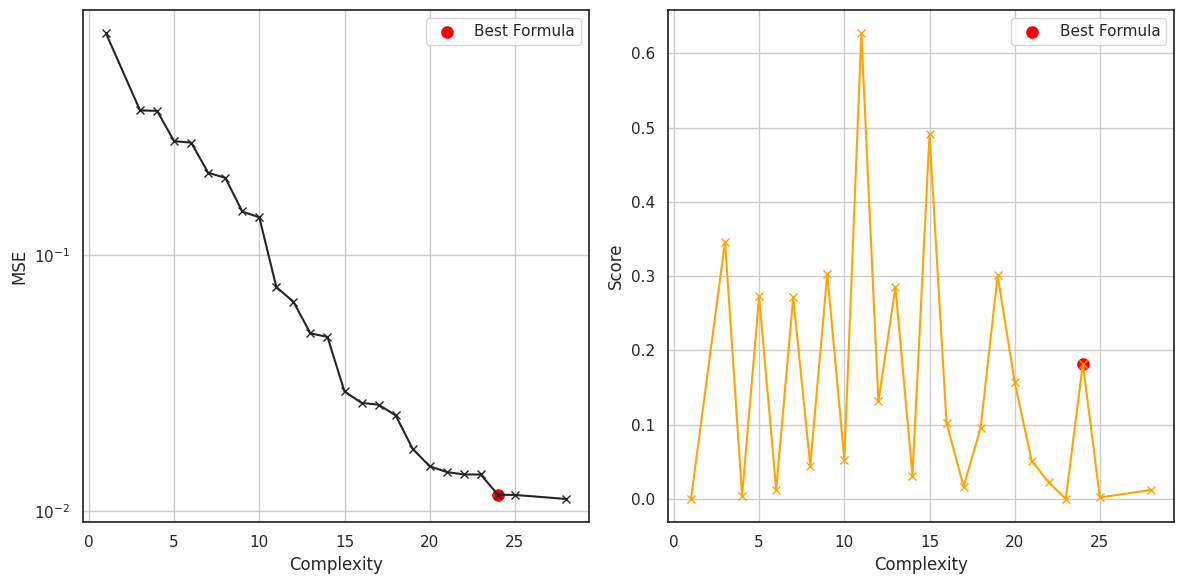

In [ ]:
# Отрисовка графиков зависимости loss и score от complexity
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

index_value = model_shaft_log.get_best().name

# График зависимости loss от complexity
axs[0].plot(model_shaft_log.equations_['complexity'], model_shaft_log.equations_['loss'], marker='x')
axs[0].set_xlabel('Complexity')
axs[0].set_ylabel('MSE')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[0].scatter(model_shaft_log.equations_['complexity'].iloc[index_value],
                model_shaft_log.equations_['loss'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

# График зависимости score от complexity
axs[1].plot(model_shaft_log.equations_['complexity'], model_shaft_log.equations_['score'], marker='x', color='orange')
axs[1].set_xlabel('Complexity')
axs[1].set_ylabel('Score')
axs[1].set_yscale('linear')
axs[1].grid(True)

axs[1].scatter(model_shaft_log.equations_['complexity'].iloc[index_value],
                model_shaft_log.equations_['score'].iloc[index_value],
                color='red', s=50, linewidth=2, label='Best Formula')

axs[0].legend()
axs[1].legend()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

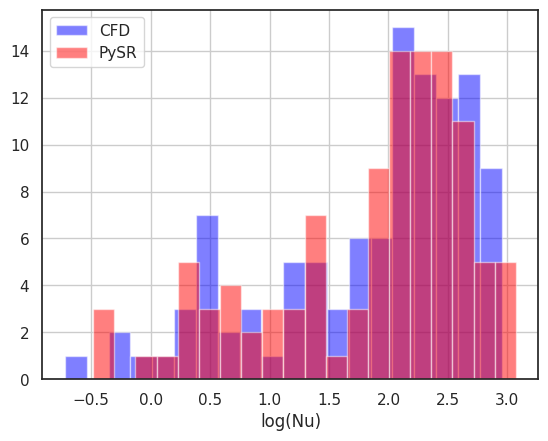

In [ ]:
# Отрисовка гистограмм log(Nu)
plt.hist(y_shaft_log, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(model_shaft_log.predict(X_shaft), label='PySR', color='red', bins=20, alpha=0.5)
plt.xlabel('log(Nu)')
plt.legend()
plt.grid(True)
plt.show()

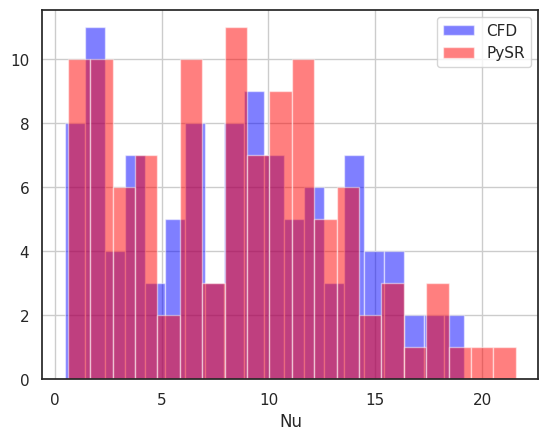

In [ ]:
# Отрисовка гистограмм Nu
plt.hist(data3_Nu_pd, label='CFD', color='blue',bins=20, alpha=0.5)
plt.hist(np.exp(model_shaft_log.predict(X_shaft)), label='PySR', color='red', bins=20, alpha=0.5)
plt.xlabel('Nu')
plt.legend()
plt.grid(True)
plt.show()

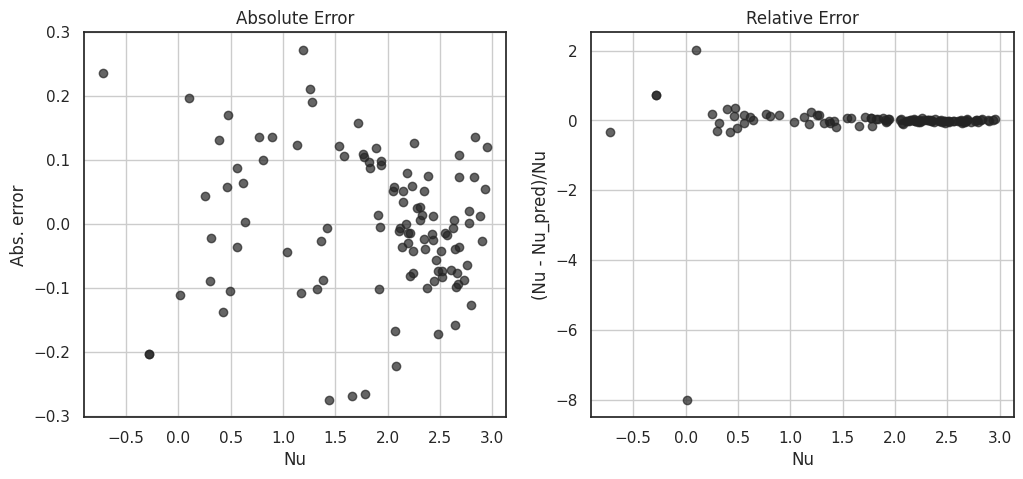

In [ ]:
# Построение графиков зависимости ошибок от Nu
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

y_pred = model_shaft_log.predict(X_shaft)

# Истинные значения
y_true = y_shaft_log.flatten() # преобр в форму (N,)

# Вычисляем ошибки
abs_error = y_pred - y_true
rel_error = (abs_error / y_true)

# График абсолютных ошибок
axs[0].scatter(y_true, abs_error, alpha=0.7)
axs[0].set_xlabel('Nu')
axs[0].set_ylabel('Abs. error')
axs[0].set_title('Absolute Error')
axs[0].grid(True)

# График относительных ошибок
axs[1].scatter(y_true, rel_error, alpha=0.7)
axs[1].set_xlabel('Nu')
axs[1].set_ylabel('(Nu - Nu_pred)/Nu')
axs[1].set_title('Relative Error')
axs[1].grid(True)

plt.show()

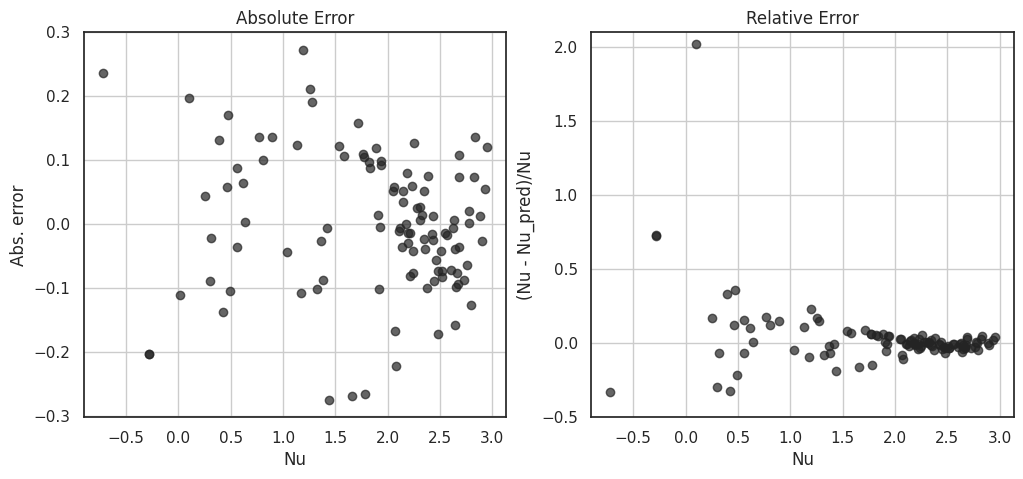

In [ ]:
# Построение графиков зависимости ошибок от Nu (с настроенным диапазоном по y)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

y_pred = model_shaft_log.predict(X_shaft)

# Истинные значения
y_true = y_shaft_log.flatten() # преобр в форму (N,)

# Вычисляем ошибки
abs_error = y_pred - y_true
rel_error = (abs_error / y_true)

# График абсолютных ошибок
axs[0].scatter(y_true, abs_error, alpha=0.7)
axs[0].set_xlabel('Nu')
axs[0].set_ylabel('Abs. error')
axs[0].set_title('Absolute Error')
axs[0].grid(True)

# График относительных ошибок (без выбивающейся точки)
axs[1].scatter(y_true, rel_error, alpha=0.7)
axs[1].set_xlabel('Nu')
axs[1].set_ylabel('(Nu - Nu_pred)/Nu')
axs[1].set_title('Relative Error')
axs[1].grid(True)
axs[1].set_ylim(-0.5, 2.1)
plt.show()

### SHAP (для log(Nu)) при использовании PySR

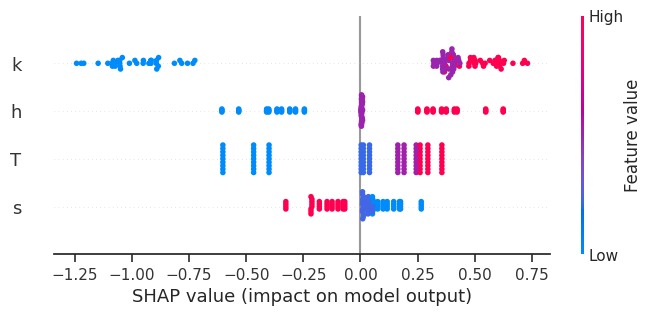

In [ ]:
explainer_ebm = shap.Explainer(model_shaft_log.predict, data3_Feat_renamed)
shap_values_ebm = explainer_ebm(data3_Feat_renamed)
shap.plots.beeswarm(shap_values_ebm)

###GPLearn

In [33]:
data_Nu_log_pd = np.log(pd.DataFrame(data3['Nu_sum']))
data_Feat_pd = pd.DataFrame(data3[['σ','s/d','H/d','εT']])


function_set = ['add', 'sub', 'mul', 'div', 'sqrt', dtanh]

model_gp = SymbolicRegressor(population_size=500, tournament_size=50, init_depth=(2,12),
                           generations=150, stopping_criteria=5e-4,
                           p_crossover=0.7, p_subtree_mutation=0.2,
                           p_hoist_mutation=0.01, p_point_mutation=0.09,
                           max_samples=0.9, verbose=1, function_set=function_set,
                           parsimony_coefficient=1.5e-3, metric='rmse', random_state=623124,
                           const_range = (-20, 20), )


model_gp.fit(data_Feat_pd.values, np.ravel(data_Nu_log_pd.values))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   130.27      9.18162e+08       31         0.737165           1.0161      4.40m
   1    18.00          3.49051        7          0.50662         0.690336      1.49m
   2    15.53          17.7626       12         0.456954         0.593035      1.28m
   3     9.01          5.55286       13         0.442284         0.540426      1.11m
   4    11.82          4.18464       10         0.428534         0.597856      1.23m
   5    13.45          3.35834       17         0.411152         0.578432      1.12m
   6    13.76           3.8727       16         0.397357         0.515583      1.15m
   7    13.60          3742.36       26         0.377873         0.631362      1.09m
   8    15.77          69.8828       25         0.391584          0.51609  

SymbolicRegressor(const_range=(-20, 20),
                  function_set=['add', 'sub', 'mul', 'div', 'sqrt',
                                <gplearn.functions._Function object at 0x7a8c1b657e90>],
                  generations=150, init_depth=(2, 12), max_samples=0.9,
                  metric='rmse', p_crossover=0.7, p_point_mutation=0.09,
                  p_subtree_mutation=0.2, parsimony_coefficient=0.0015,
                  population_size=500, random_state=623124,
                  stopping_criteria=0.0005, tournament_size=50, verbose=1)

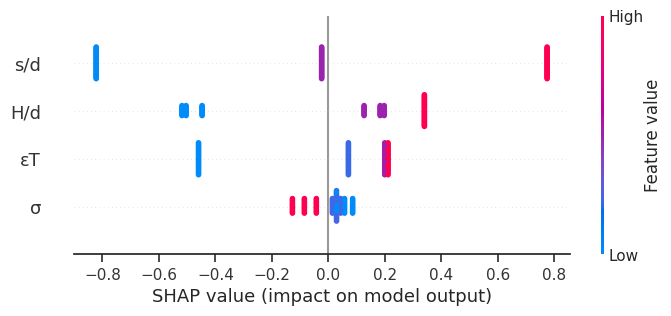

In [34]:
explainer = shap.Explainer(model_gp.predict, data_Feat_pd)

shap_values = explainer(data_Feat_pd)

shap.plots.beeswarm(shap_values)

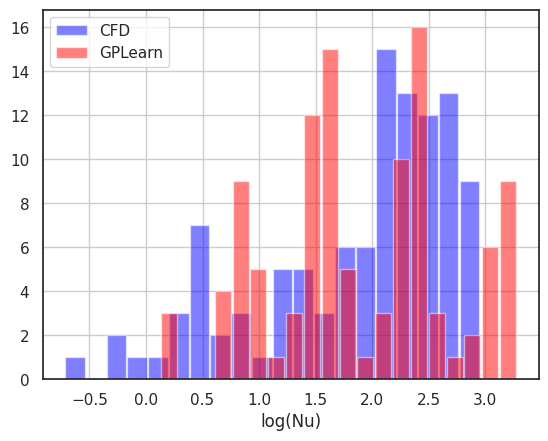

In [35]:
plt.hist(data_Nu_log_pd, label='CFD', color='blue',bins=20, alpha=0.5, rwidth=0.95)
plt.hist(model_gp.predict(data_Feat_pd), label='GPLearn', color='red', bins=20, alpha=0.5, rwidth=0.9)
plt.xlabel('log(Nu)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

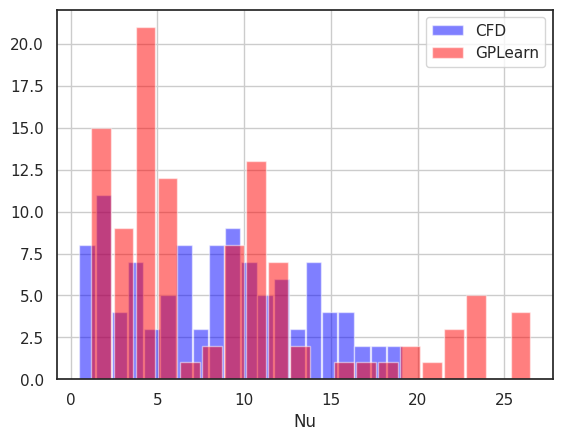

In [36]:
plt.hist(np.exp(data_Nu_log_pd), label='CFD', color='blue',bins=20, alpha=0.5, rwidth=0.95)
plt.hist(np.exp(model_gp.predict(data_Feat_pd)), label='GPLearn', color='red', bins=20, alpha=0.5, rwidth=0.9)
plt.xlabel('Nu', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

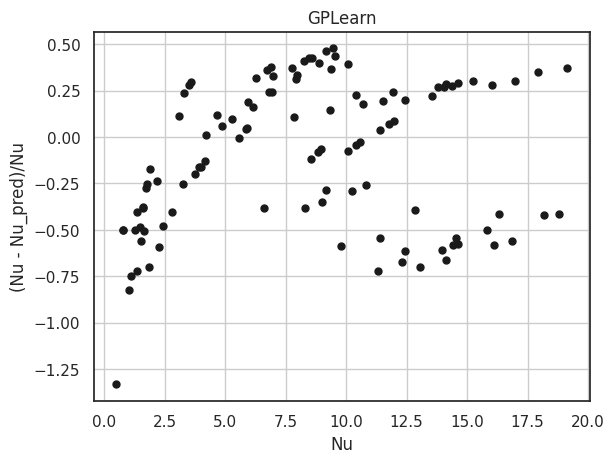

In [37]:
rel_err = (np.ravel(np.exp(data_Nu_log_pd.values)) - np.exp(model_gp.predict(data_Feat_pd)))/np.exp(data_Nu_log_pd.values[:, 0])
plt.scatter(np.ravel(np.exp(data_Nu_log_pd.values)),np.ravel(rel_err),s=25, c='k')
plt.title('GPLearn')
plt.xlabel('Nu', fontsize=12)
plt.ylabel('(Nu - Nu_pred)/Nu', fontsize=12)
plt.grid(True)